In [1]:
import hist
import awkward as ak

In [2]:
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
plt.style.use(hep.style.CMS)
plt.rcParams.update({'font.size': 20})

In [4]:
import glob
import pyarrow.parquet as pq

# destdir = 'v1_plots'
# sig_samples_pq = ak.from_parquet(glob.glob("./v1/GluGluToHH/nominal/*"))
# bkg_samples_pq = ak.from_parquet(glob.glob("./v1/ttHToGG/nominal/*"))

# destdir = 'v1_preEE_plots'
# sig_samples_pq = ak.from_parquet(glob.glob("./v1_preEE/GluGluToHH/nominal/*"))
# bkg_samples_pq = ak.from_parquet(glob.glob("./v1_preEE/ttHToGG/nominal/*"))

destdir = 'v1_merged_plots'
# sig_samples_list = [ak.from_parquet(glob.glob(dir_path)) for dir_path in ["../HiggsDNA_parquet/v1/GluGluToHH/nominal/*", "../HiggsDNA_parquet/v1_preEE/GluGluToHH/nominal/*"]]
# sig_samples_pq = ak.concatenate(sig_samples_list)
# bkg_samples_list = [ak.from_parquet(glob.glob(dir_path)) for dir_path in ["../HiggsDNA_parquet/v1/ttHToGG/nominal/*", "../HiggsDNA_parquet/v1_preEE/ttHToGG/nominal/*"]]
# bkg_samples_pq = ak.concatenate(bkg_samples_list)
sig_samples_pq = ak.from_parquet(glob.glob("../HiggsDNA_official/output_HH_test1/GluGluToHH/nominal/*"))
bkg_samples_pq = ak.from_parquet(glob.glob("../HiggsDNA_official/output_ttH_test3/ttHToGG/nominal/*"))

samples = {
    'sig': sig_samples_pq,
    'bkg': bkg_samples_pq,
}



# destdir = 'v1_merged_plots'

# sample_xss = {
#     # https://twiki.cern.ch/twiki/bin/view/LHCPhysics/LHCHWGHH?redirectedfrom=LHCPhysics.LHCHXSWGHH#Current_recommendations_for_HH_c
#     'sig_preEE': 34.43*0.0026,
#     # https://twiki.cern.ch/twiki/bin/view/LHCPhysics/CERNYellowReportPageAt13TeV#ttH_Process
#     'bkg_preEE': 506.5*0.00228,
#     'sig_postEE': 34.43*0.0026,
#     'bkg_postEE': 506.5*0.00228,
# }
# sample_lumis = {
#     'sig_preEE': 7.874,
#     'bkg_preEE': 7.874,
#     'sig_postEE': 26.337,
#     'bkg_postEE': 26.337,
# }

# sample_filepaths = {
#     'sig_preEE': "./v1_preEE/GluGluToHH/nominal/*",
#     'bkg_preEE': "./v1_preEE/ttHToGG/nominal/*",
#     'sig_postEE': "./v1/GluGluToHH/nominal/*",
#     'bkg_postEE': "./v1/ttHToGG/nominal/*",
# }

# samples = {}
# for sample_name, filepath in sample_filepaths.items():
#     samples[sample_name] = ak.from_parquet(glob.glob(filepath))
#     samples[sample_name]['sumGenWeights'] = sum(
#             float(pq.read_table(file).schema.metadata[b'sum_genw_presel']) for file in glob.glob(
#                 filepath
#             )
#         )

In [5]:
print(sig_samples_pq.fields)


['lead_seediEtaOriX', 'lead_cutBased', 'lead_electronVeto', 'lead_hasConversionTracks', 'lead_isScEtaEB', 'lead_isScEtaEE', 'lead_mvaID_WP80', 'lead_mvaID_WP90', 'lead_pixelSeed', 'lead_seedGain', 'lead_electronIdx', 'lead_jetIdx', 'lead_seediPhiOriY', 'lead_vidNestedWPBitmap', 'lead_ecalPFClusterIso', 'lead_energyErr', 'lead_energyRaw', 'lead_esEffSigmaRR', 'lead_esEnergyOverRawE', 'lead_eta', 'lead_etaWidth', 'lead_haloTaggerMVAVal', 'lead_hcalPFClusterIso', 'lead_hoe', 'lead_hoe_PUcorr', 'lead_mvaID', 'lead_pfChargedIso', 'lead_pfChargedIsoPFPV', 'lead_pfChargedIsoWorstVtx', 'lead_pfPhoIso03', 'lead_pfRelIso03_all_quadratic', 'lead_pfRelIso03_chg_quadratic', 'lead_phi', 'lead_phiWidth', 'lead_pt', 'lead_r9', 'lead_s4', 'lead_sieie', 'lead_sieip', 'lead_sipip', 'lead_trkSumPtHollowConeDR03', 'lead_trkSumPtSolidConeDR04', 'lead_x_calo', 'lead_y_calo', 'lead_z_calo', 'lead_genPartFlav', 'lead_genPartIdx', 'lead_electronIdxG', 'lead_genPartIdxG', 'lead_jetIdxG', 'lead_ScEta', 'lead_char

In [6]:
import math
import re

hists_axes={}

## General Photon Vars ##
# Dipohoton vars #
hists_axes['mass'] = hist.axis.Regular(50, 25., 150., name='var', label=r'$M_{\gamma\gamma}$ [GeV]', growth=False)
hists_axes['pt'] = hist.axis.Regular(50, 20., 2000, name='var', label=r' $\gamma\gamma p_{T}$ [GeV]', growth=True)
hists_axes['eta'] = hist.axis.Regular(20, -5., 5., name='var', label=r' $\gamma\gamma \eta $ [GeV]', growth=True)
hists_axes['phi'] = hist.axis.Regular(16, -4., 4., name='var', label=r' $\gamma \gamma \phi$ [GeV]', growth=True)

# Lead photon vars #
hists_axes['lead_pt'] = hist.axis.Regular(25, 20., 1000, name='var', label=r'Lead Photon  $p_{T}$ [GeV]', growth=False)
hists_axes['lead_eta'] = hist.axis.Regular(20, -5., 5., name='var', label=r'Lead Photon $\eta $ [GeV]', growth=True)
hists_axes['lead_phi'] = hist.axis.Regular(16, -4., 4., name='var', label=r'Lead Photon $\phi$ [GeV]', growth=True)

# Sublead photon vars #
hists_axes['sublead_pt'] = hist.axis.Regular(25, 20., 1000, name='var', label=r'Sublead Photon  $p_{T}$ [GeV]', growth=False)
hists_axes['sublead_eta'] = hist.axis.Regular(20, -5., 5., name='var', label=r'Sublead Photon $\eta $ [GeV]', growth=True)
hists_axes['sublead_phi'] = hist.axis.Regular(16, -4., 4., name='var', label=r'Sublead Photon $\phi$ [GeV]', growth=True)



In [7]:
## ttH Killer Vars ##
# Angular vars #
hists_axes['DeltaR_jg_min'] = hist.axis.Regular(50, 0, 5, name='var', label=r'min$(\Delta R(jet, \gamma))$', growth=False)
hists_axes['CosThetaStar_CS'] = hist.axis.Regular(50, -1, 1, name='var', label=r'cos$(\theta_{CS})$', growth=False)
hists_axes['CosThetaStar_jj'] = hist.axis.Regular(50, -1, 1, name='var', label=r'cos$(\theta_{jj})$', growth=False)
    # Adding in abs of cos vars
for sample in samples.values():
    sample['abs_CosThetaStar_CS'] = ak.where(sample['CosThetaStar_CS'] >= 0, sample['CosThetaStar_CS'], -1*sample['CosThetaStar_CS'])
    sample['abs_CosThetaStar_jj'] = ak.where(sample['CosThetaStar_jj'] >= 0, sample['CosThetaStar_jj'], -1*sample['CosThetaStar_jj'])
    hists_axes['abs_CosThetaStar_CS'] = hist.axis.Regular(25, 0, 1, name='var', label=r'|cos$(\theta_{CS})$|', growth=False)
    hists_axes['abs_CosThetaStar_jj'] = hist.axis.Regular(25, 0, 1, name='var', label=r'|cos$(\theta_{jj})$|', growth=False)



In [8]:
# Leptonic W decay vars #
hists_axes['puppiMET_pt'] = hist.axis.Regular(50, 20., 250, name='var', label=r'puppi MET', growth=False)
    # Adding in DeltaPhi of bjets and MET
def ak_sign(ak_array, inverse=False):
    if not inverse:
        return ak.where(ak_array < 0, -1, 1)
    else:
        return ak.where(ak_array < 0, 1, -1)
def ak_abs(ak_array):
    valid_entry_mask = ak.where(ak_array != -999, True, False)
    abs_ak_array = ak.where(ak_array > 0, ak_array, -ak_array)
    return ak.where(valid_entry_mask, abs_ak_array, -999)
def deltaPhi(phi1, phi2):
    # angle1 and angle2 are (-pi, pi]
    # Convention: clockwise is (+), anti-clockwise is (-)
    subtract_angles = phi1 - phi2
    return ak.where(ak_abs(subtract_angles) <= math.pi, subtract_angles, subtract_angles + 2*math.pi*ak_sign(subtract_angles, inverse=True))
for sample in samples.values():
    sample['DeltaPhi_j1MET'] = deltaPhi(sample['lead_bjet_phi'], sample['puppiMET_phi'])
    sample['DeltaPhi_j2MET'] = deltaPhi(sample['sublead_bjet_phi'], sample['puppiMET_phi'])
    hists_axes['DeltaPhi_j1MET'] = hist.axis.Regular(50,-3.2, 3.2, name='var', label=r'$\Delta\phi(bjet_1, MET)$', growth=False)
    hists_axes['DeltaPhi_j2MET'] = hist.axis.Regular(50, -3.2, 3.2, name='var', label=r'$\Delta\phi(bjet_2, MET)$', growth=False)
hists_axes['lepton1_pt'] = hist.axis.Regular(50, 0., 200, name='var', label=r'lead lepton $p_T$ [GeV]', growth=False)
hists_axes['lepton2_pt'] = hist.axis.Regular(50, 0., 200, name='var', label=r'sublead lepton $p_T$ [GeV]', growth=False)
    # Adding in kinematics of electrons and muons separately
def lead_lepton_pt(sample, pass_num, lepton_gen):
    if pass_num > 1:
        prev_lepton_pass = lead_lepton_pt(sample, pass_num-1, lepton_gen)
    else:
        prev_lepton_pass = ak.Array([-999 for _ in range(ak.num(sample['event'], axis=0))])
    return ak.where(
        ak.where(sample[f'lepton{pass_num}_generation'] == lepton_gen, True, False) & ak.where(prev_lepton_pass == -999, True, False), 
        sample[f'lepton{pass_num}_pt'], 
        prev_lepton_pass
    )
def sublead_lepton_pt(sample, pass_num, lepton_gen, lead_lepton):
    if pass_num > 2:
        prev_lepton_pass = sublead_lepton_pt(sample, pass_num-1, lepton_gen, lead_lepton)
    else:
        prev_lepton_pass = ak.Array([-999 for _ in range(ak.num(sample['event'], axis=0))])
    return ak.where(
        ak.where(sample[f'lepton{pass_num}_generation'] == lepton_gen, True, False) & ak.where(prev_lepton_pass == -999, True, False) & ak.where(lead_lepton != sample[f'lepton{pass_num}_pt'], True, False), 
        sample[f'lepton{pass_num}_pt'], 
        prev_lepton_pass
    )
for sample in samples.values():
    sample['lead_electron_pt'] = lead_lepton_pt(sample, 4, 1)
    sample['sublead_electron_pt'] = sublead_lepton_pt(sample, 4, 1, sample['lead_electron_pt'])
    sample['lead_muon_pt'] = lead_lepton_pt(sample, 4, 2)
    sample['sublead_muon_pt'] = sublead_lepton_pt(sample, 4, 2, sample['lead_muon_pt'])
    hists_axes['lead_electron_pt'] = hist.axis.Regular(50, 0., 200, name='var', label=r'lead electron $p_T$ [GeV]', growth=False)
    hists_axes['sublead_electron_pt'] = hist.axis.Regular(50, 0., 200, name='var', label=r'sublead electron $p_T$ [GeV]', growth=False)
    hists_axes['lead_muon_pt'] = hist.axis.Regular(50, 0., 200, name='var', label=r'lead muon $p_T$ [GeV]', growth=False)
    hists_axes['sublead_muon_pt'] = hist.axis.Regular(50, 0., 200, name='var', label=r'sublead muon $p_T$ [GeV]', growth=False)



In [9]:
# Hadronic W decay vars #
import vector as vec # https://github.com/scikit-hep/vector
vec.register_awkward()

for sample in samples.values():

    for field in ['lead', 'sublead']:
        sample[f'{field}_bjet_4mom'] = ak.zip(
            {
                'rho': sample[f'{field}_bjet_pt'], # rho is synonym for pt
                'phi': sample[f'{field}_bjet_phi'],
                'eta': sample[f'{field}_bjet_eta'],
                'tau': sample[f'{field}_bjet_mass'], # tau is synonym for mass
            }, with_name='Momentum4D'
        )

    for i in range(1, 7): # how to not hard-code 7 jets?
        sample[f'jet{i}_4mom'] = ak.zip(
            {
                'rho': sample[f'jet{i}_pt'],
                'phi': sample[f'jet{i}_phi'],
                'eta': sample[f'jet{i}_eta'],
                'tau': sample[f'jet{i}_mass'],
            }, with_name='Momentum4D'
        )
            
    for jet_type in ['w', 'top']:
        for jet_num in range(1, 3):
            # sample[f'{jet_type}{jet_num}jet_4mom'] = ak.copy(sample['zero_vector'])
            sample[f'{jet_type}{jet_num}jet_4mom'] = ak.Array(
                [
                    {'rho': 0, 'phi': 0, 'eta': 0, 'tau': 0} for _ in range(ak.num(sample['event'], axis=0))
                ], with_name='Momentum4D'
            )


In [10]:
# Hadronic W decay vars cont. #

# Need to figure out how to do this all at once instead of using for loops, it gets messed up due to initial conditions
#   on wjet_4mom and topjet_4mom arrays.
#   -> use one large matrix of jets_4mom and apply masks and ak.where all at once on that? likely faster as well

def jets_mask(sample, jet_size, i, j, t_mask, i_mask=None, j_mask=None):
    jet_i_mask = t_mask & ak.where(
            sample[f'jet{i}_4mom'].deltaR(sample[f'lead_bjet_4mom']) > jet_size, True, False
        ) & ak.where(
            sample[f'jet{i}_4mom'].deltaR(sample[f'sublead_bjet_4mom']) > jet_size, True, False
        ) & ak.where(sample[f'jet{i}_pt'] != -999, True, False)
    if i_mask is not None:
        jet_i_mask = jet_i_mask & i_mask
    
    jet_j_mask = t_mask & ak.where(
            sample[f'jet{j}_4mom'].deltaR(sample[f'lead_bjet_4mom']) > jet_size, True, False
        ) & ak.where(
            sample[f'jet{j}_4mom'].deltaR(sample[f'sublead_bjet_4mom']) > jet_size, True, False
        ) & ak.where(sample[f'jet{j}_pt'] != -999, True, False)
    if j_mask is not None:
        jet_j_mask = jet_j_mask & j_mask

    return jet_i_mask, jet_j_mask

def find_wjet_topjet(sample, num_jets, jet_size, w_mass, top_mass, t_mask, chi_form='t0'):
    
    jet_combos = []
    for i in range(1, num_jets+1):
        jet_combos.extend(
            [(i, j) for j in range(i+1, num_jets+1)]
        )

    chosen_w1jets = ak.Array(
        [
            {'i': -999, 'j': -999} for _ in range(ak.num(sample['event'], axis=0))
        ]
    )
    chosen_w1jets_deltaR = ak.Array(
        [0 for _ in range(ak.num(sample['event'], axis=0))]
    )

    
    for i, j in jet_combos:
        # Masks for non bjets and jet exists (jet_pt != -999)
        jet_i_mask, jet_j_mask = jets_mask(sample, jet_size, i, j, t_mask)

        # Select w-jets by minimizing difference between dijet invt mass and w mass
        # w1_decision_mask = (
        #     ak.where(
        #         ak_abs(w_mass - (sample[f'jet{i}_4mom'] + sample[f'jet{j}_4mom']).mass) < 
        #         ak_abs(w_mass - sample['w1jet_4mom'].mass), True, False
        #     ) | ak.where(
        #         sample['w1jet_4mom'].mass == 0, True, False
        #     )
        # ) & jet_i_mask & jet_j_mask
        # Select w-jets by minimizing deltaR between two not b-jets
        w1_decision_mask = (
            ak.where(
                sample[f'jet{i}_4mom'].deltaR(sample[f'jet{j}_4mom']) < 
                chosen_w1jets_deltaR, 
                True, False
            ) | ak.where(
                sample['w1jet_4mom'].mass == 0, True, False
            )
        ) & jet_i_mask & jet_j_mask
        
        sample['w1jet_4mom'] = ak.where(
            w1_decision_mask,
            sample[f'jet{i}_4mom'] + sample[f'jet{j}_4mom'], sample['w1jet_4mom']
        )

        
        chosen_w1jets['i'] = ak.where(
            w1_decision_mask,
            i, chosen_w1jets['i']
        )
        chosen_w1jets['j'] = ak.where(
            w1_decision_mask,
            j, chosen_w1jets['j']
        )
        chosen_w1jets_deltaR = ak.where(
            w1_decision_mask,
            sample[f'jet{i}_4mom'].deltaR(sample[f'jet{j}_4mom']), chosen_w1jets_deltaR
        )

    # Select bjet by minimizing difference between tri-jet invt mass and top mass
    # bjet_mass_comparison_mask = ak.where(
    #     ak_abs(top_mass - (sample['w1jet_4mom'] + sample[f'lead_bjet_4mom']).mass) <
    #     ak_abs(top_mass - (sample['w1jet_4mom'] + sample[f'sublead_bjet_4mom']).mass),
    #     True, False)
    # Select bjet by minimizing deltaR between W-jet and b-jet
    bjet_mass_comparison_mask = ak.where(
        sample['w1jet_4mom'].deltaR(sample[f'lead_bjet_4mom']) <
        sample['w1jet_4mom'].deltaR(sample[f'sublead_bjet_4mom']),
        True, False
    )
    sample['top1jet_4mom'] = ak.where(
        bjet_mass_comparison_mask,
        sample['w1jet_4mom'] + sample[f'lead_bjet_4mom'], 
        sample['w1jet_4mom'] + sample[f'sublead_bjet_4mom']
    )

    if chi_form == 't1':
        # Select other wjet by dijet of reminaing two jets 
        for k, l in jet_combos:
            # Masks for non-bjets, not choosing same jets as w1, and jet exists (jet_pt != -999)
            jet_k_mask, jet_l_mask = jets_mask(
                sample, jet_size, k, l, t_mask, 
                i_mask=ak.where(chosen_w1jets['i'] != k, True, False),
                j_mask=ak.where(chosen_w1jets['j'] != l, True, False)
            )
            
            w2_decision_mask = jet_k_mask & jet_l_mask
            sample['w2jet_4mom'] = ak.where(
                w2_decision_mask,
                sample[f'jet{k}_4mom'] + sample[f'jet{l}_4mom'], sample['w2jet_4mom']
            )
        # Select other bjet 
        sample['top2jet_4mom'] = ak.where(
            ~bjet_mass_comparison_mask,
            sample['w1jet_4mom'] + sample[f'lead_bjet_4mom'], 
            sample['w1jet_4mom'] + sample[f'sublead_bjet_4mom']
        )

def chi_t0(sample, num_jets, jet_size):
    w_mass = 80.377
    top_mass = 172.76

    # To not include events with 4 extra jets, as its covered by chi_t1
    t_mask = ak.where(
        sample['jet4_pt'] != -999, True, False
    ) & ak.where(
        sample['jet6_pt'] == -999, True, False
    )
    
    find_wjet_topjet(
        sample, num_jets, jet_size, w_mass, top_mass, t_mask, chi_form='t0'
    )
    
    term1 = ((w_mass - ak.where(sample['w1jet_4mom'].mass == 0, -999, sample['w1jet_4mom'].mass)) / (0.1 * w_mass))**2
    term2 = ((top_mass - ak.where(sample['w1jet_4mom'].mass == 0, -999, sample['top1jet_4mom'].mass)) / (0.1 * top_mass))**2

    # return ak.where(t_mask, term1+term2, -999)
    return ak.where(t_mask, term1+term2, -999), ak.where(
        ak.where(sample['w1jet_4mom'].mass != 0, True, False) & t_mask, 
        sample['w1jet_4mom'].mass, -999
    ), ak.where(
        ak.where(sample['w1jet_4mom'].mass != 0, True, False) & t_mask, 
        sample['top1jet_4mom'].mass, -999
    )
        
def chi_t1(sample, num_jets, jet_size):
    w_mass = 80.377
    top_mass = 172.76

    t_mask = ak.where(
        sample['jet6_pt'] != -999, True, False
    )
    
    find_wjet_topjet(
        sample, num_jets, jet_size, w_mass, top_mass, t_mask, chi_form='t1'
    )

    term1_1 = ((w_mass - ak.where(sample['w1jet_4mom'].mass == 0, -999, sample['w1jet_4mom'].mass)) / (0.1 * w_mass))**2
    term1_2 = ((top_mass - ak.where(sample['w1jet_4mom'].mass == 0, -999, sample['top1jet_4mom'].mass)) / (0.1 * top_mass))**2

    term2_1 = ((w_mass - ak.where(sample['w1jet_4mom'].mass == 0, -999, sample['w2jet_4mom'].mass)) / (0.1 * w_mass))**2
    term2_2 = ((top_mass - ak.where(sample['w1jet_4mom'].mass == 0, -999, sample['top2jet_4mom'].mass)) / (0.1 * top_mass))**2

    # return ak.where(t_mask, term1_1+term1_2+term2_1+term2_2, -999)
    return ak.where(t_mask, term1_1+term1_2+term2_1+term2_2, -999), ak.where(
        ak.where(sample['w1jet_4mom'].mass != 0, True, False) & t_mask, 
        sample['w1jet_4mom'].mass, -999
    ), ak.where(
        ak.where(sample['w1jet_4mom'].mass != 0, True, False) & t_mask, 
        sample['top1jet_4mom'].mass, -999
    ), ak.where(
        ak.where(sample['w1jet_4mom'].mass != 0, True, False) & t_mask, 
        sample['w2jet_4mom'].mass, -999
    ), ak.where(
        ak.where(sample['w1jet_4mom'].mass != 0, True, False) & t_mask, 
        sample['top2jet_4mom'].mass, -999
    )
            

for sample in samples.values():
    # sample['chi_t0^2'] = chi_t0(sample, 6, 0.4)
    # sample['chi_t1^2'] = chi_t1(sample, 6, 0.4)
    # hists_axes['chi_t0^2'] = hist.axis.Regular(80, 0., 120, name='var', label=r'$\chi_{t0}^2$', growth=False)
    # hists_axes['chi_t1^2'] = hist.axis.Regular(40, 0., 220, name='var', label=r'$\chi_{t1}^2$', growth=False)
    
    sample['chi_t0^2'], sample['chi_t0_wjet_mass'], sample['chi_t0_topjet_mass'] = chi_t0(sample, 6, 0.4)
    sample['chi_t1^2'], sample['chi_t1_w1jet_mass'], sample['chi_t1_top1jet_mass'], sample['chi_t1_w2jet_mass'], sample['chi_t1_top2jet_mass'] = chi_t1(sample, 6, 0.4)

    hists_axes['chi_t0^2'] = hist.axis.Regular(70, 0., 150, name='var', label=r'$\chi_{t0}^2$', growth=False)
    hists_axes['chi_t0_wjet_mass'] = hist.axis.Regular(50, 0., 250, name='var', label=r'$m_{{jj}_W}$ from $\chi_{t0}^2$', growth=False)
    hists_axes['chi_t0_topjet_mass'] = hist.axis.Regular(50, 50., 400, name='var', label=r'$m_{{bjj}_t}$ from $\chi_{t0}^2$', growth=False)
    hists_axes['chi_t1^2'] = hist.axis.Regular(70, 0., 500, name='var', label=r'$\chi_{t1}^2$', growth=False)
    hists_axes['chi_t1_w1jet_mass'] = hist.axis.Regular(50, 0., 175, name='var', label=r'$m_{{jj}_{W1}}$ from $\chi_{t1}^2$', growth=False)
    hists_axes['chi_t1_top1jet_mass'] = hist.axis.Regular(50, 50., 300, name='var', label=r'$m_{{bjj}_{t1}}$ from $\chi_{t1}^2$', growth=False)
    hists_axes['chi_t1_w2jet_mass'] = hist.axis.Regular(50, 0., 300, name='var', label=r'$m_{{jj}_{W2}}$ from $\chi_{t1}^2$', growth=False)
    hists_axes['chi_t1_top2jet_mass'] = hist.axis.Regular(50, 50., 400, name='var', label=r'$m_{{bjj}_{t2}}$ from $\chi_{t1}^2$', growth=False)


In [11]:
for sample in samples.values():
    hists_axes['lead_bjet_btagPNetB'] = hist.axis.Regular(50, 0., 1, name='var', label=r'lead $b$jet PNet btag Score B', growth=False)
    hists_axes['sublead_bjet_btagPNetB'] = hist.axis.Regular(50, 0., 1, name='var', label=r'sublead $b$jet PNet btag Score B', growth=False)
    hists_axes['chi_t0'] = hist.axis.Regular(70, 0., 150, name='var', label=r'$\chi_{t0}^2$', growth=False)
    hists_axes['chi_t1'] = hist.axis.Regular(70, 0., 500, name='var', label=r'$\chi_{t1}^2$', growth=False)

In [12]:
## Leptonic W Decay vars ##
for sample in samples.values():
    for field in ['lead', 'sublead']:
        sample[f'{field}_lepton_4mom'] = ak.zip(
            {
                'rho': sample[f'lepton{"1" if field == "lead" else "2"}_pt'], # rho is synonym for pt
                'phi': sample[f'lepton{"1" if field == "lead" else "2"}_phi'],
                'eta': sample[f'lepton{"1" if field == "lead" else "2"}_eta'],
                'tau': sample[f'lepton{"1" if field == "lead" else "2"}_mass'], # tau is synonym for mass
            }, with_name='Momentum4D'
        )
        
    # min deltaR between bjets and lead lepton #
def min_deltaR_bjet_lepton(sample, lepton_type='lead'):
    min_deltaR_mask = ak.where(
        sample[f'{lepton_type}_lepton_4mom'].deltaR(sample[f'lead_bjet_4mom']) <
        sample[f'{lepton_type}_lepton_4mom'].deltaR(sample[f'sublead_bjet_4mom']),
        True, False
    )

    return ak.where(
        min_deltaR_mask,
        sample[f'{lepton_type}_lepton_4mom'].deltaR(sample[f'lead_bjet_4mom']),
        sample[f'{lepton_type}_lepton_4mom'].deltaR(sample[f'sublead_bjet_4mom'])
    )
def deltaR_bjet_lepton(sample, lepton_type='lead', bjet_type='lead'):
    return sample[f'{lepton_type}_lepton_4mom'].deltaR(sample[f'{bjet_type}_bjet_4mom'])

for sample in samples.values():
    sample['min_deltaR_bjet_leadLepton'] = min_deltaR_bjet_lepton(sample)
    sample['min_deltaR_bjet_subleadLepton'] = min_deltaR_bjet_lepton(sample, lepton_type='sublead')
    hists_axes['min_deltaR_bjet_leadLepton'] = hist.axis.Regular(50, 0, 5, name='var', label=r'min$(\Delta R(bjet, l_{lead}))$', growth=False)
    hists_axes['min_deltaR_bjet_subleadLepton'] = hist.axis.Regular(50, 0, 5, name='var', label=r'min$(\Delta R(bjet, l_{sublead}))$', growth=False)

    sample['leadBjet_leadLepton'] = deltaR_bjet_lepton(sample)
    sample['leadBjet_subleadLepton'] = deltaR_bjet_lepton(sample, lepton_type='sublead')
    sample['subleadBjet_leadLepton'] = deltaR_bjet_lepton(sample, bjet_type='sublead')
    sample['subleadBjet_subleadLepton'] = deltaR_bjet_lepton(sample, lepton_type='sublead', bjet_type='sublead')
    hists_axes['leadBjet_leadLepton'] = hist.axis.Regular(50, 0, 5, name='var', label=r'$\Delta R(bjet_{lead}, l_{lead})$', growth=False)
    hists_axes['leadBjet_subleadLepton'] = hist.axis.Regular(50, 0, 5, name='var', label=r'$\Delta R(bjet_{lead}, l_{sublead})$', growth=False)
    hists_axes['subleadBjet_leadLepton'] = hist.axis.Regular(50, 0, 5, name='var', label=r'$\Delta R(bjet_{sublead}, l_{lead})$', growth=False)
    hists_axes['subleadBjet_subleadLepton'] = hist.axis.Regular(50, 0, 5, name='var', label=r'$\Delta R(bjet_{sublead}, l_{sublead})$', growth=False)


In [13]:
hists = {}
for sample_name, sample in samples.items():
    
    hists[sample_name] = {}
    for field in hists_axes.keys():
        temp_pq = sample[field][~ak.is_none(sample[field], axis=0)]
        htemp = hist.Hist(hists_axes[field])
        htemp.fill(var = temp_pq)
        hists[sample_name][field] = htemp

In [14]:
# hists = {}
# for sample_name in ['sig', 'bkg']:
    
#     hists[sample_name] = {}
#     for field in hists_axes.keys():
#         if sample_name == 'sig':
#             sample_field = ak.concatenate(
#                 [
#                     (
#                         samples['sig_preEE'][field] * samples['sig_preEE']['genWeight']
#                     ) * sample_xss['sig_preEE'] * sample_lumis['sig_preEE'] / samples['sig_preEE']['sumGenWeights'],
#                     (
#                         samples['sig_postEE'][field] * samples['sig_postEE']['genWeight']
#                     ) * sample_xss['sig_postEE'] * sample_lumis['sig_postEE'] / samples['sig_postEE']['sumGenWeights']
#                 ]
#             )
#         elif sample_name == 'bkg':
#             sample_field = ak.concatenate(
#                 [
#                     (
#                         samples['bkg_preEE'][field] * samples['bkg_preEE']['genWeight']
#                     ) * sample_xss['bkg_preEE'] * sample_lumis['bkg_preEE'] / samples['bkg_preEE']['sumGenWeights'],
#                     (
#                         samples['bkg_postEE'][field] * samples['bkg_postEE']['genWeight']
#                     ) * sample_xss['bkg_postEE'] * sample_lumis['bkg_postEE'] / samples['bkg_postEE']['sumGenWeights']
#                 ]
#             )
#         temp_pq = sample_field[~ak.is_none(sample_field, axis=0)]
#         htemp = hist.Hist(hists_axes[field])
#         htemp.fill(var = temp_pq)
#         hists[sample_name][field] = htemp

In [15]:
import os
import sys
import argparse
import matplotlib.colors as mcolors

simplified_labels = {
               "sig": r"${HH \rightarrow b\bar{b}\gamma\gamma}$", 
               "bkg": r"${ttH \rightarrow \gamma\gamma}$",
}

/tmp/ipykernel_1953053/920512558.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 8))
/uscms/home/tsievert/nobackup/miniconda3/envs/higgs-dna-hhbbgg/lib/python3.10/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/uscms/home/tsievert/nobackup/miniconda3/envs/higgs-dna-hhbbgg/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/uscms/home/tsievert/nobackup/miniconda3/envs/higgs-dna-hhbbgg/lib/python3.10/site-packages/mplhep/utils.py:242: Ru

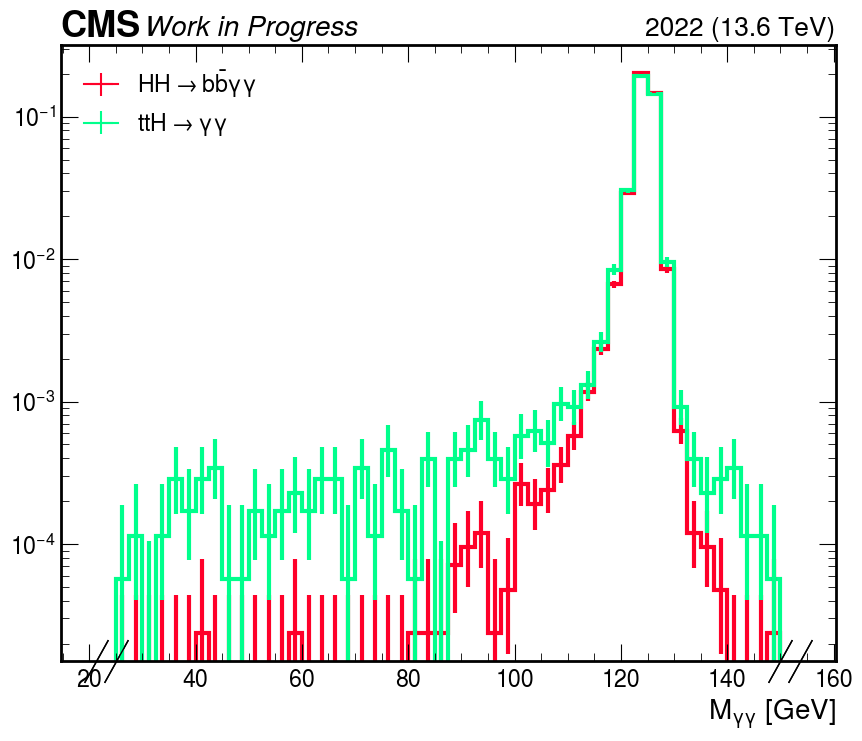

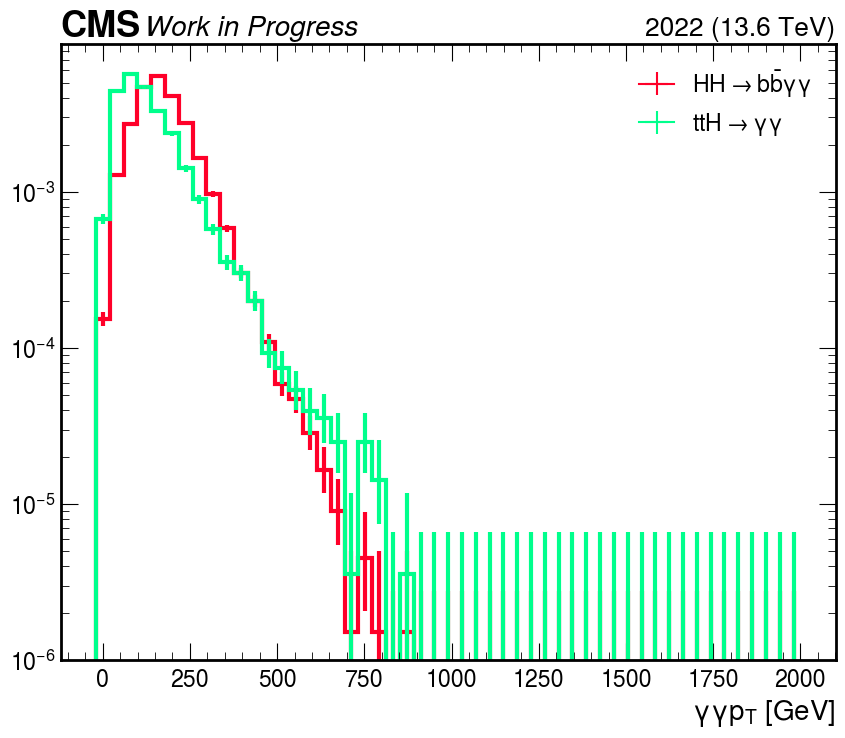

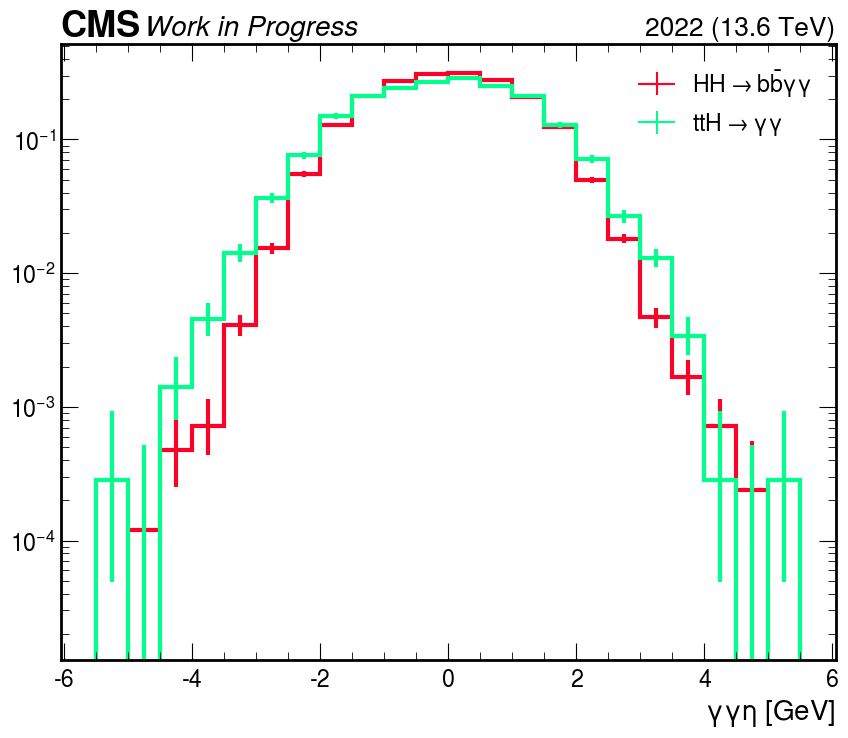

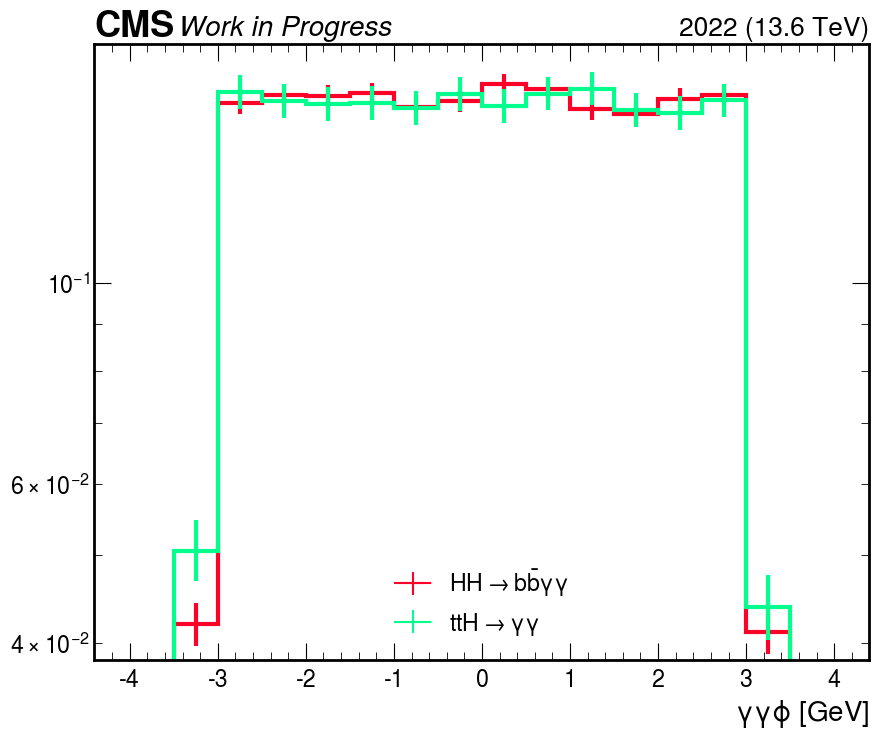

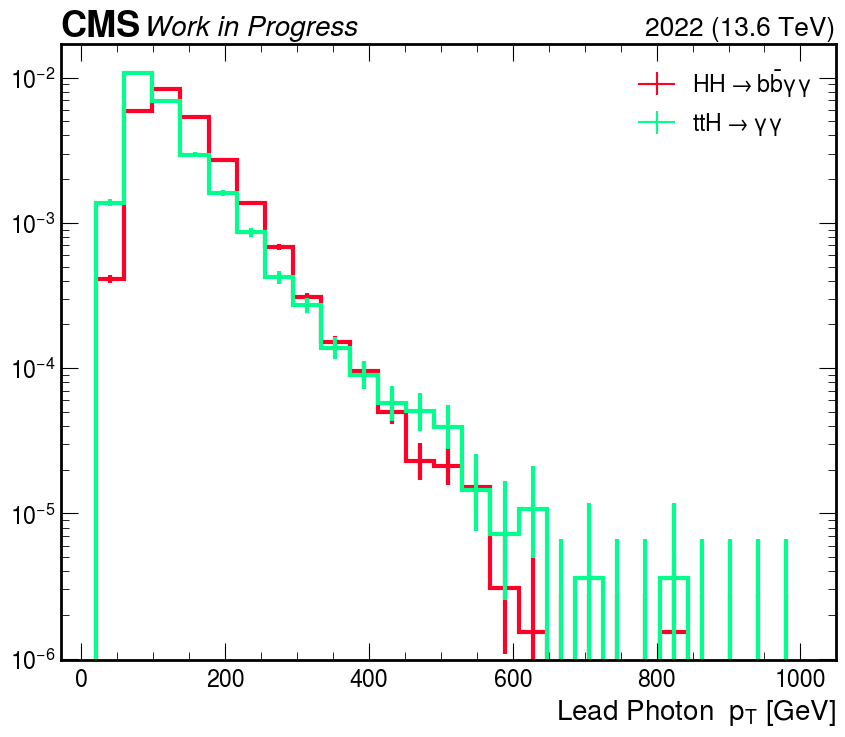

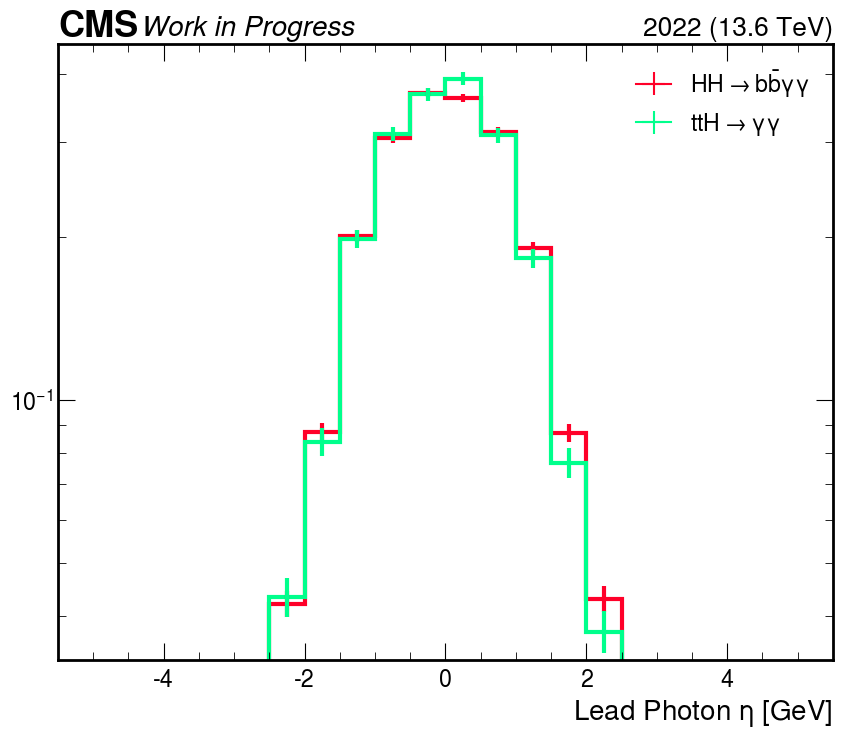

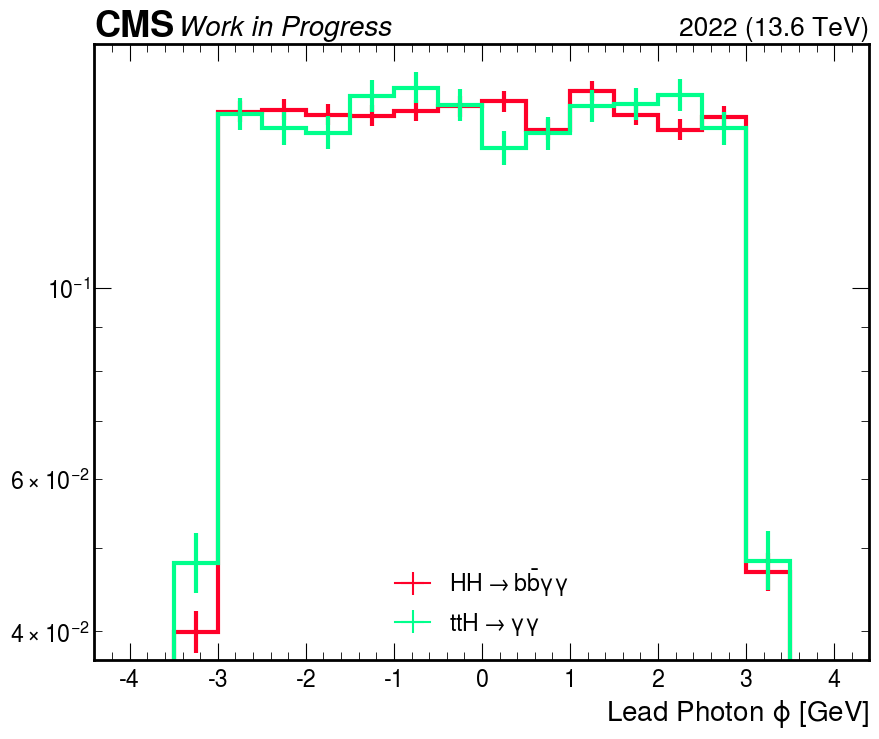

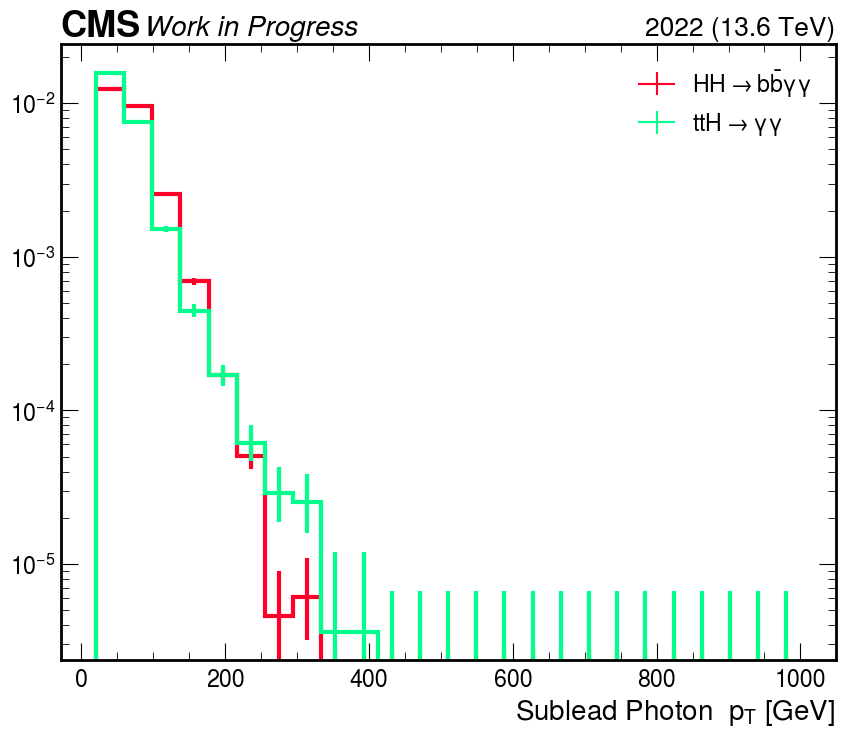

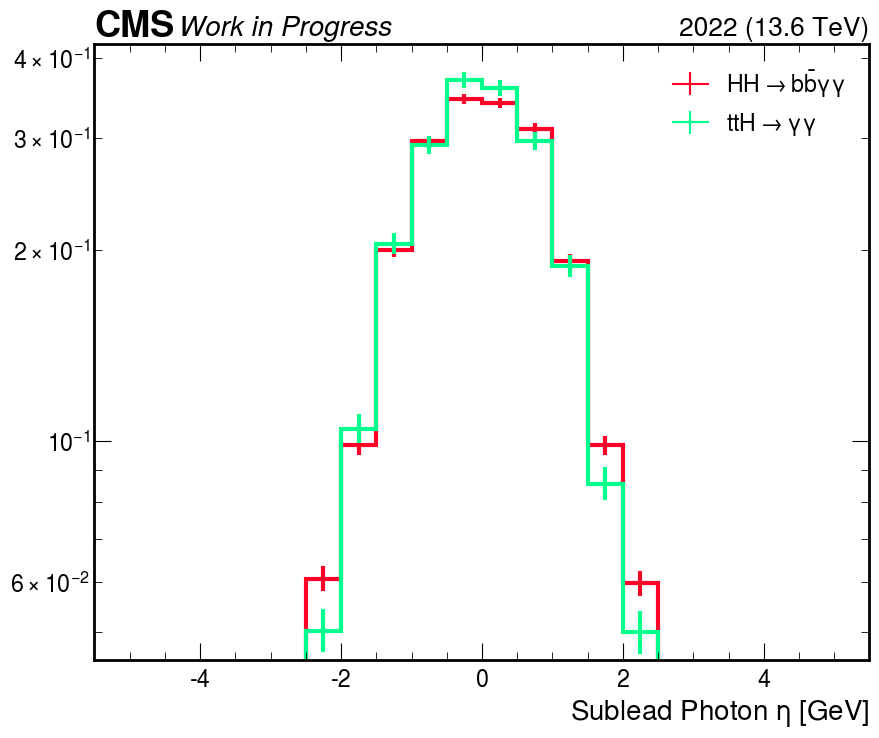

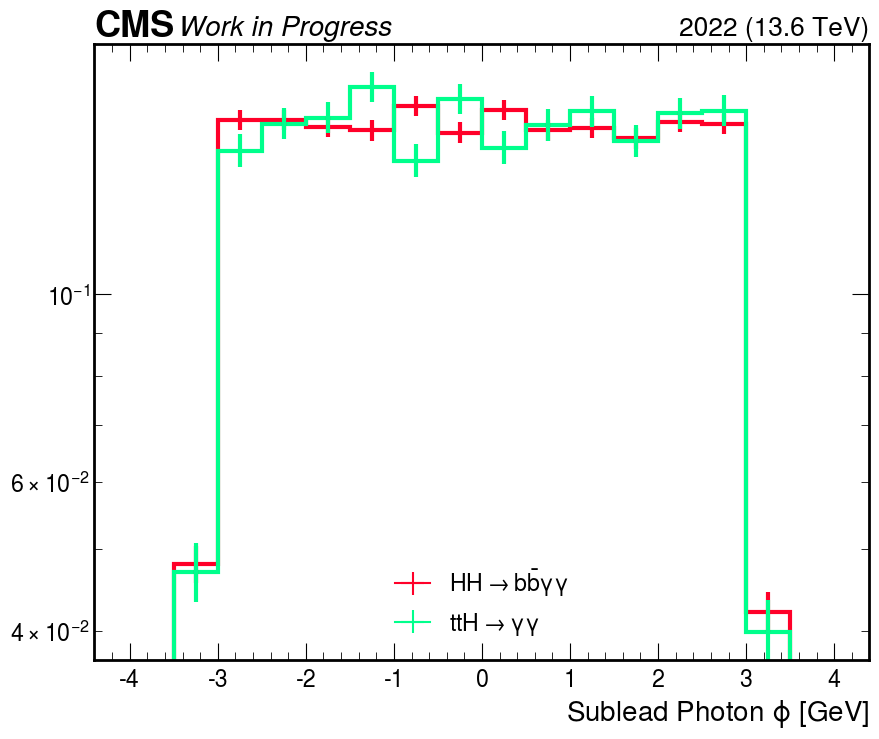

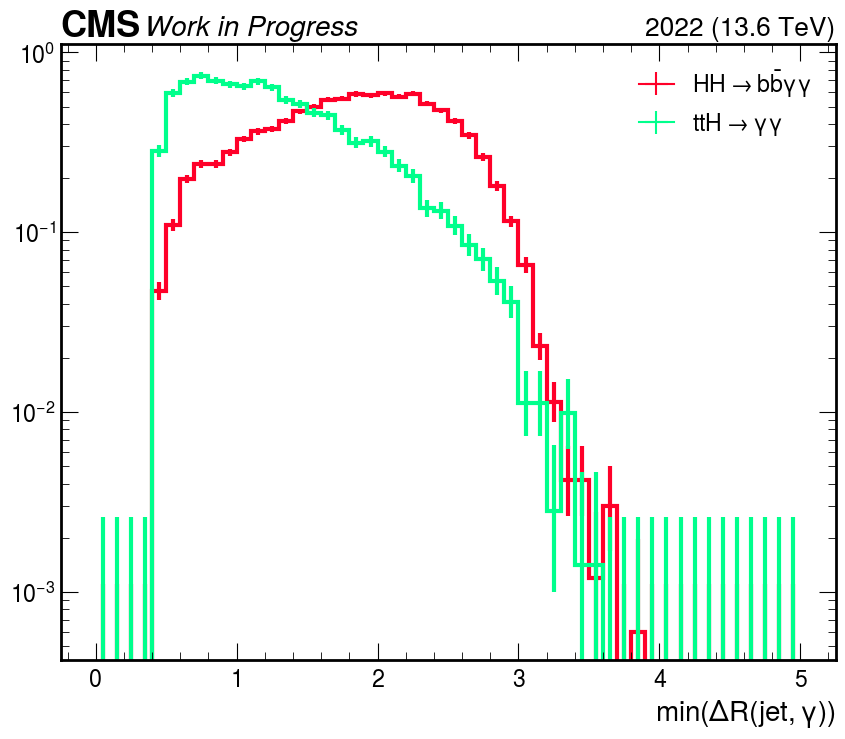

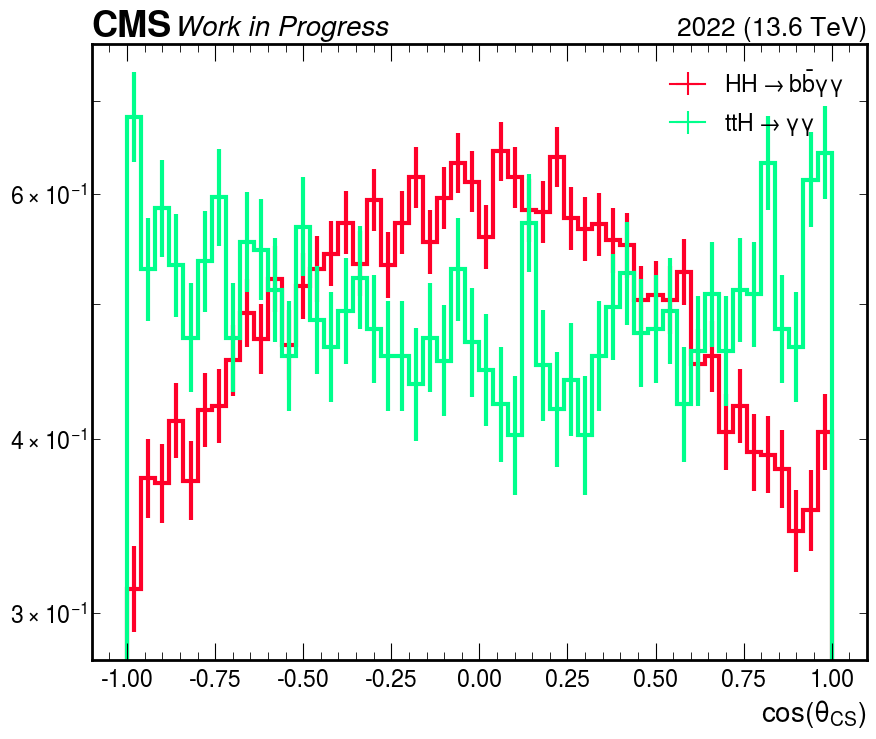

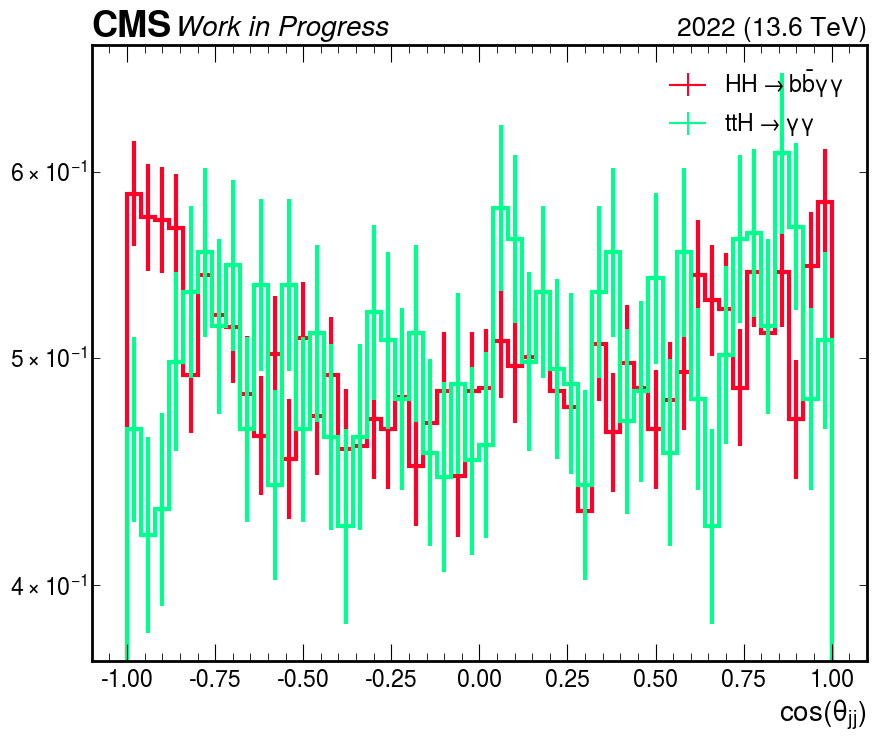

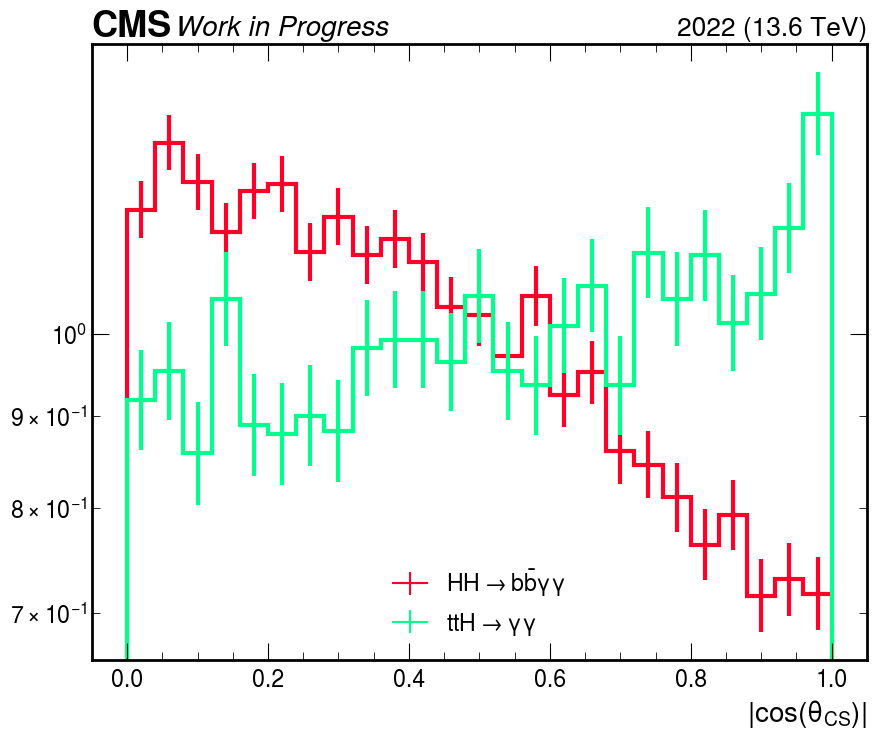

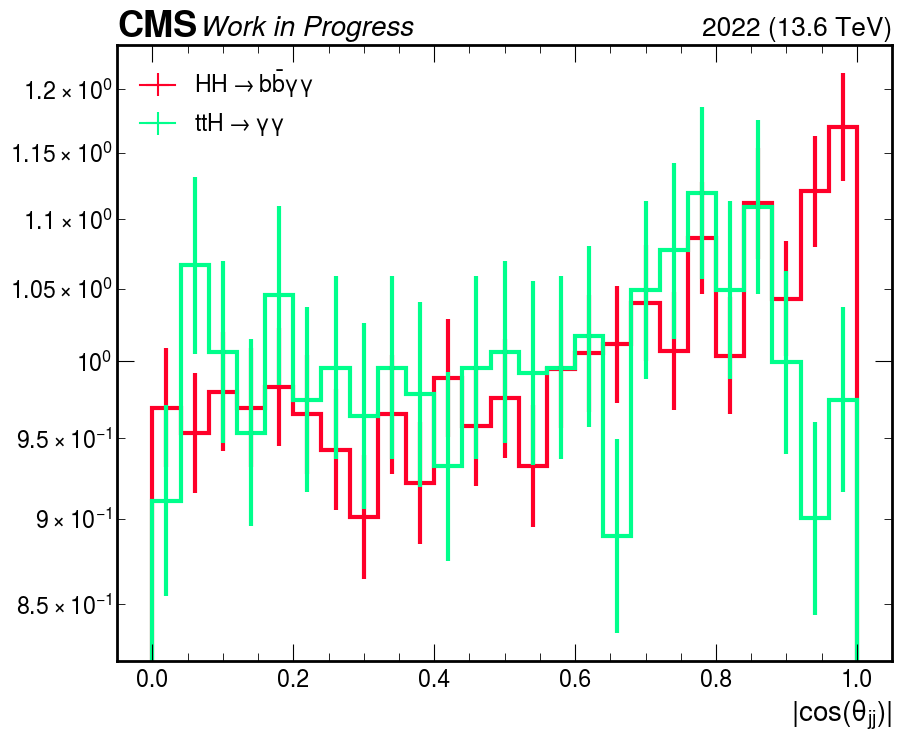

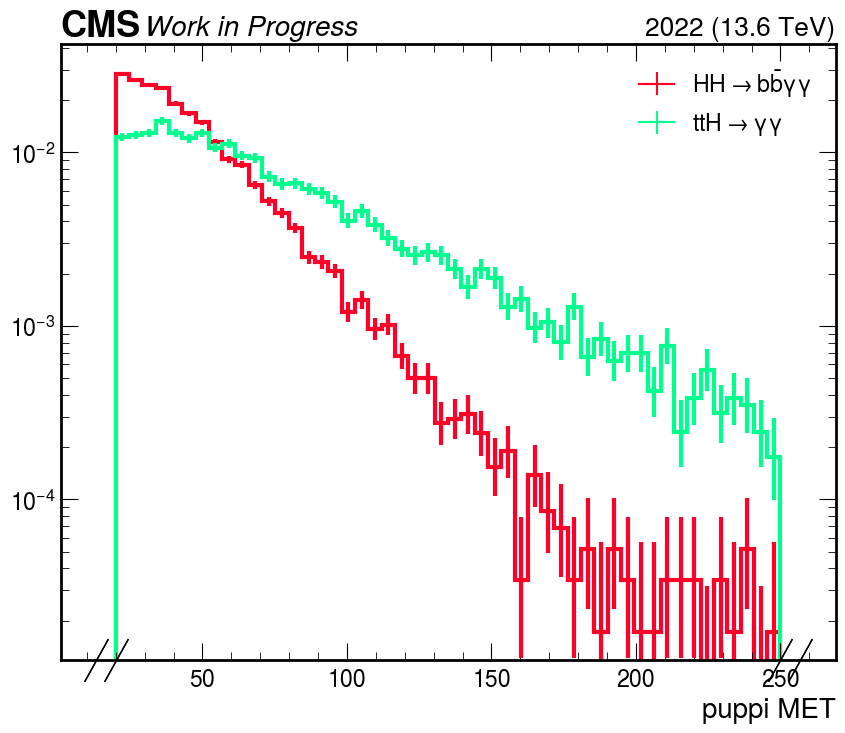

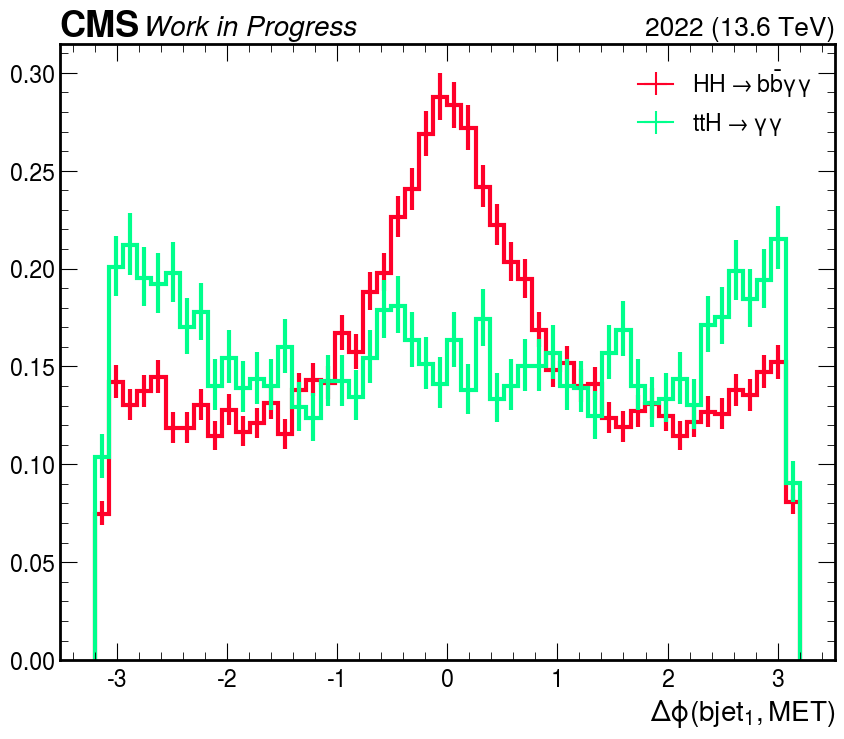

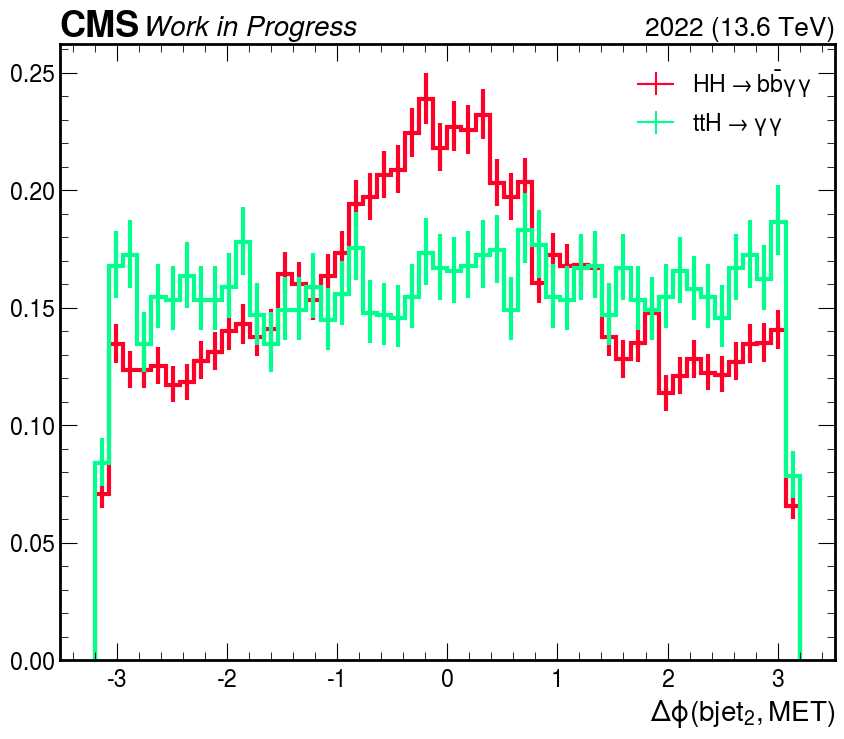

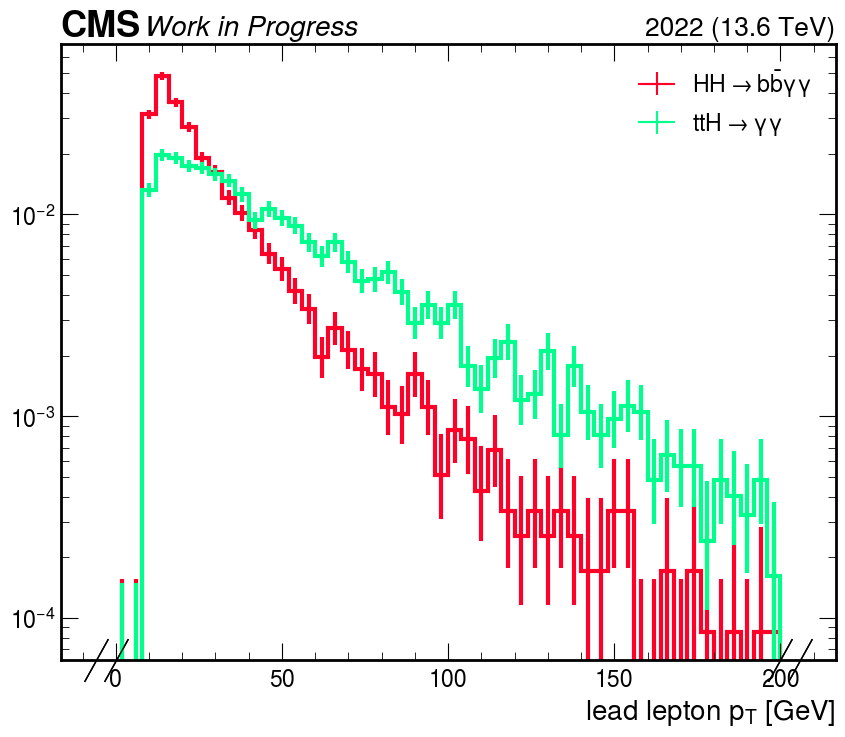

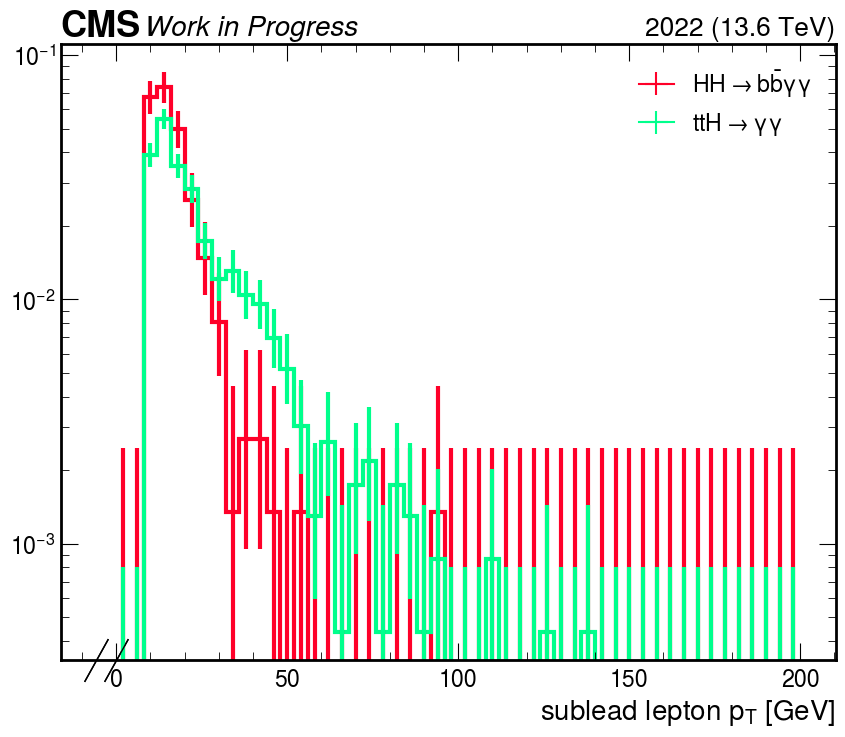

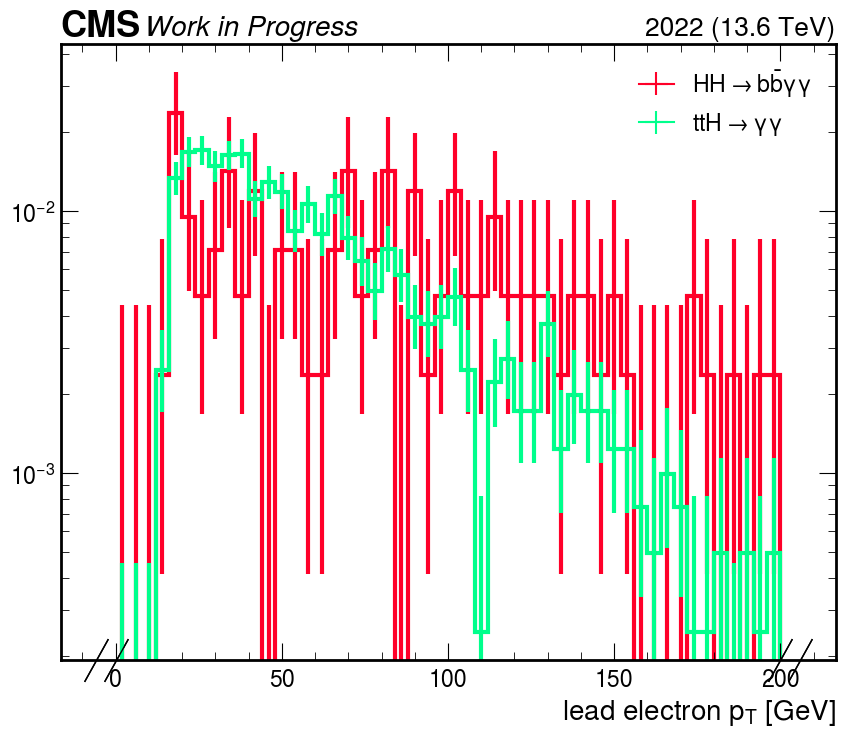

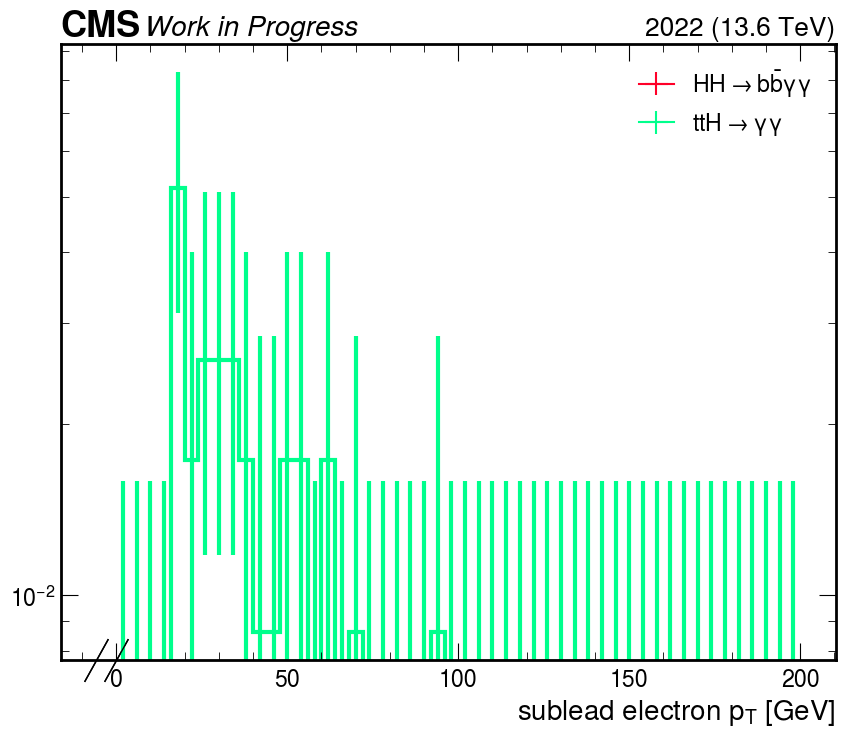

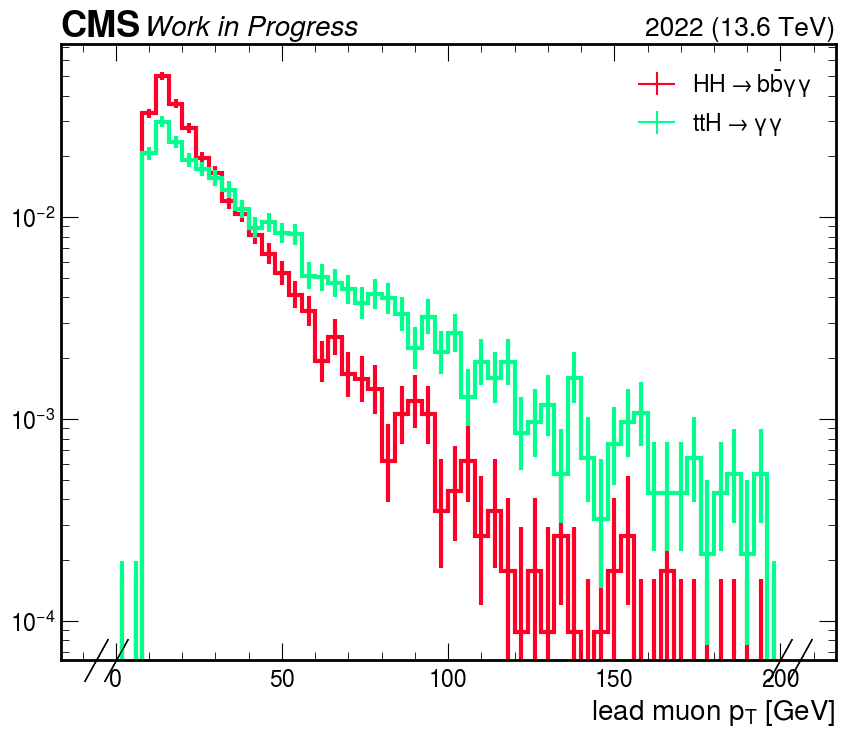

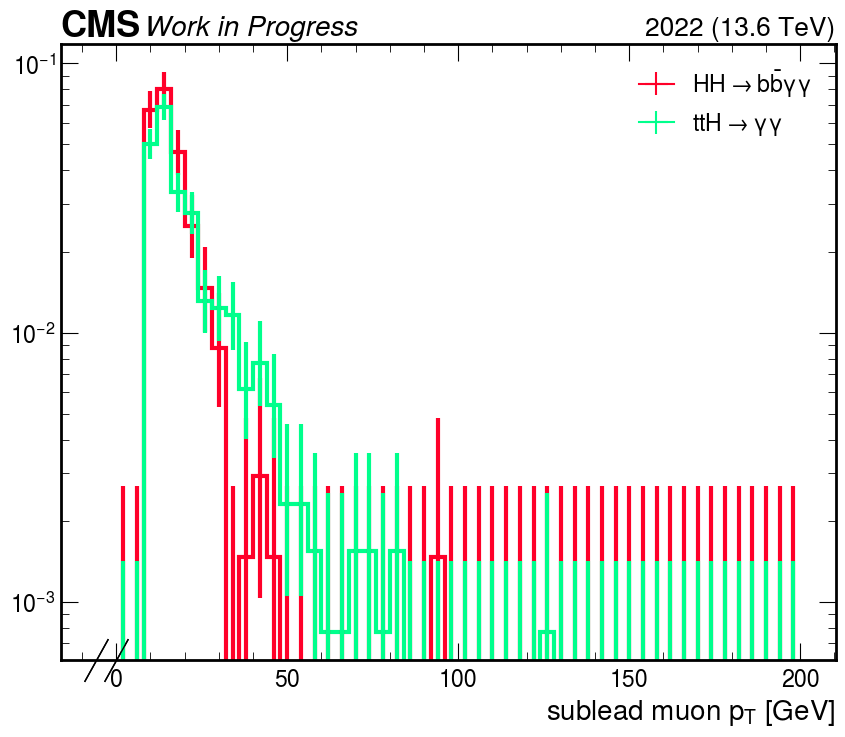

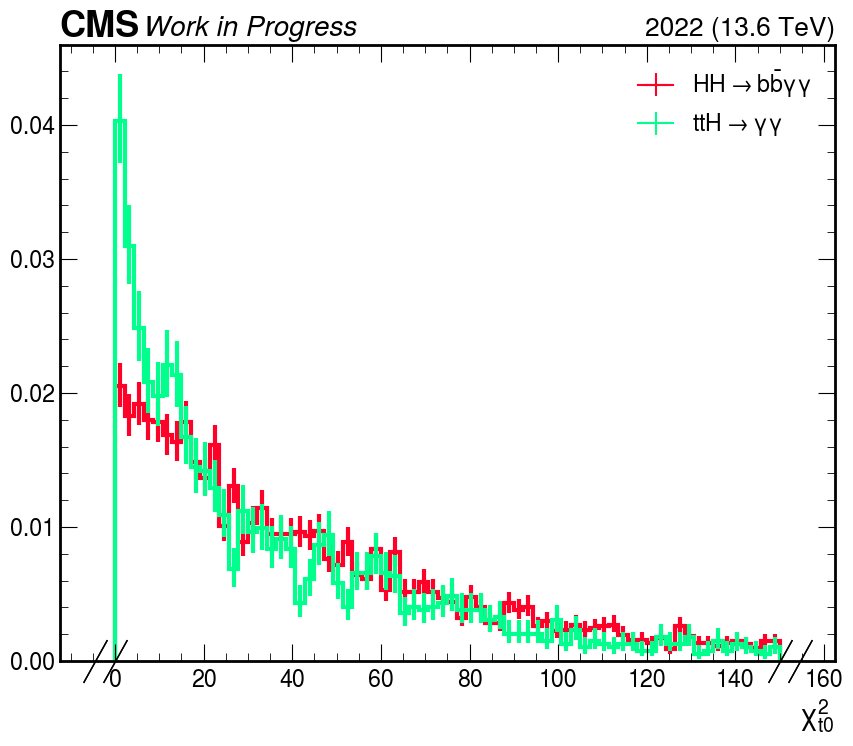

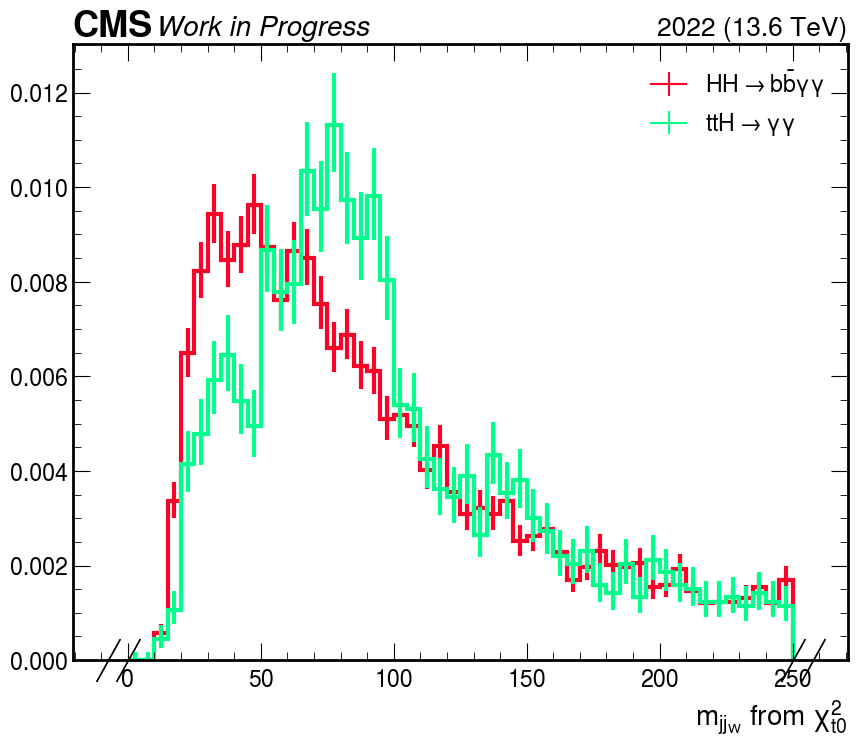

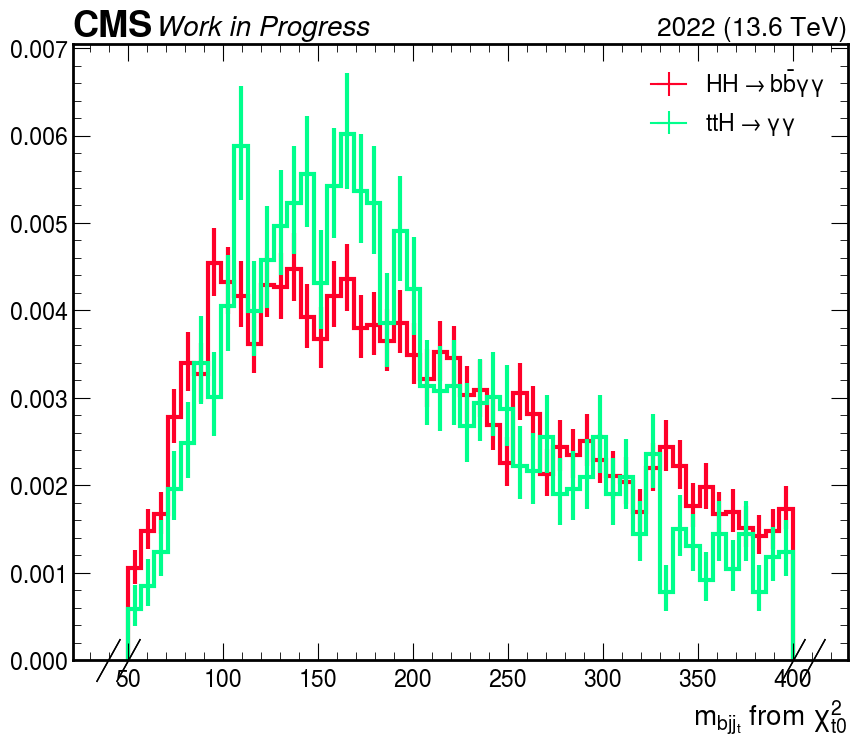

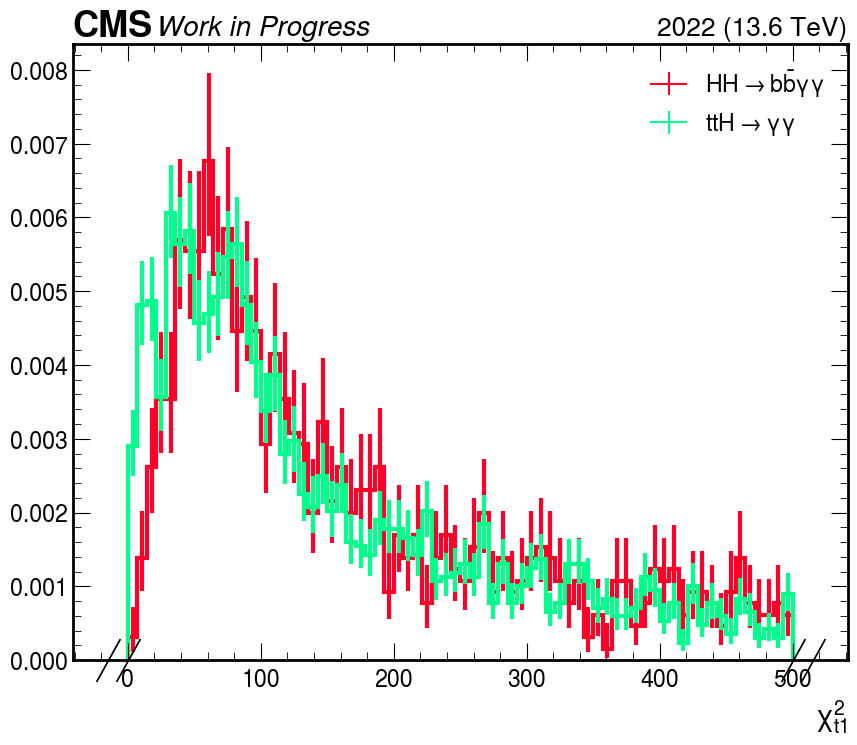

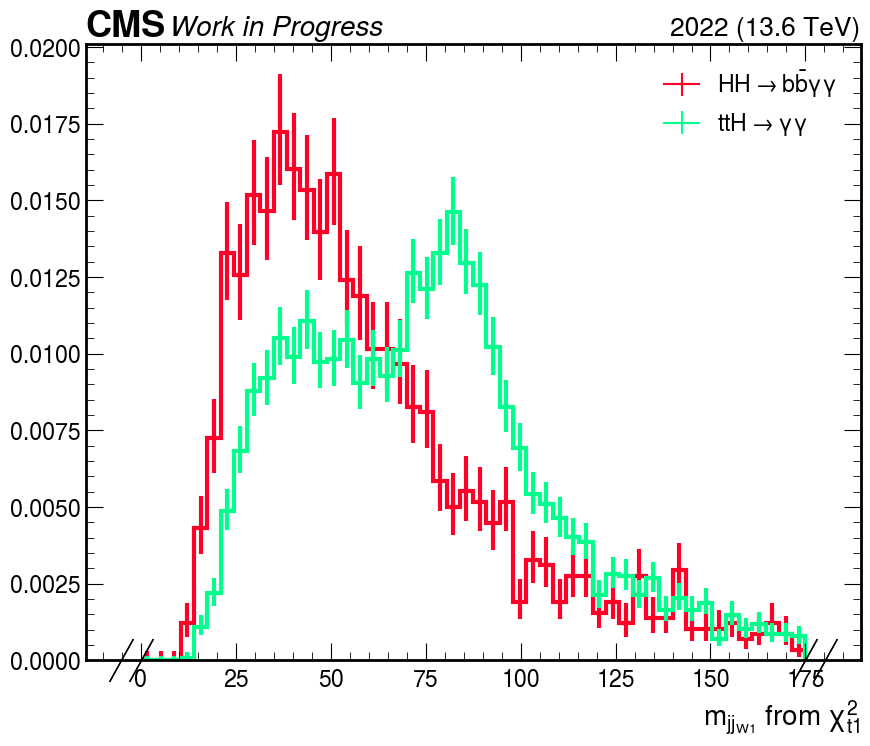

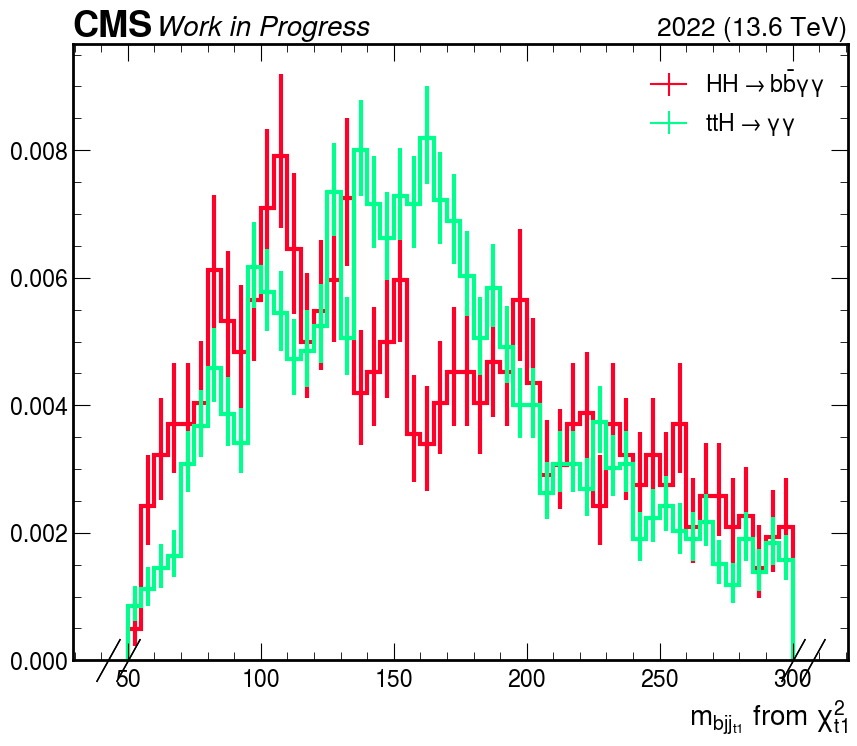

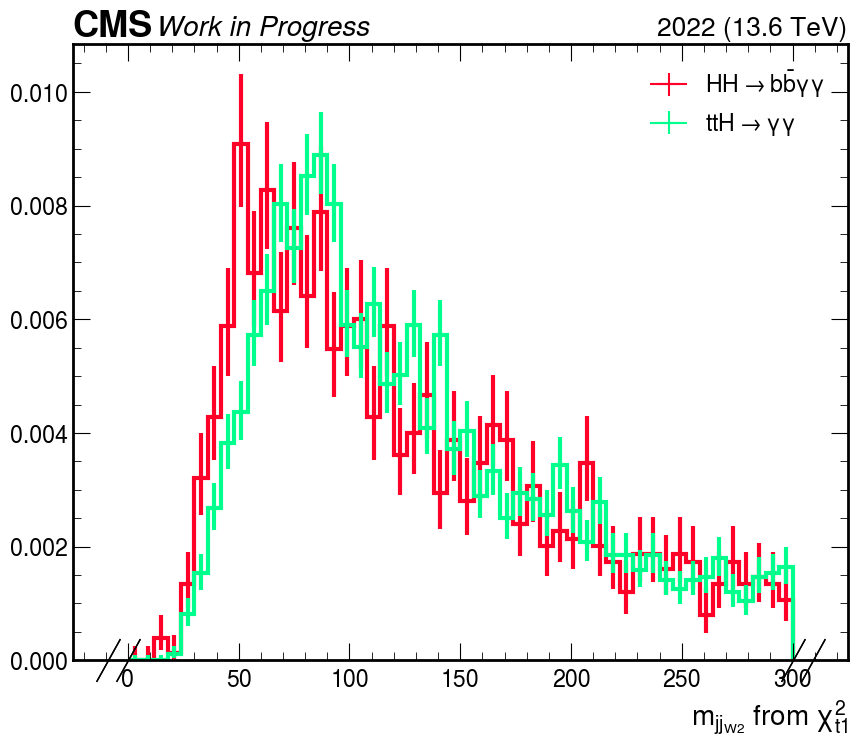

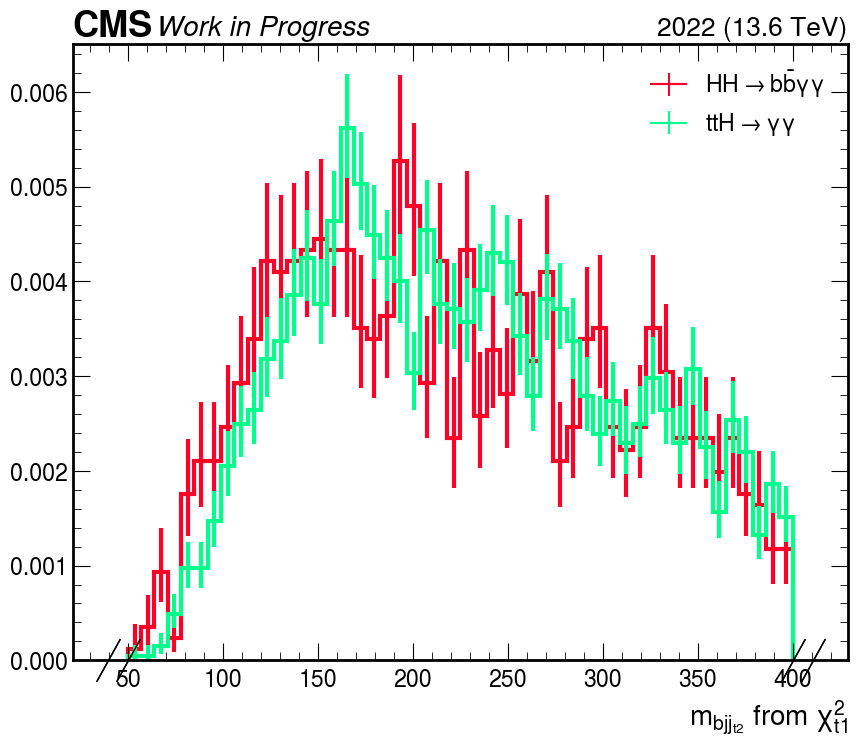

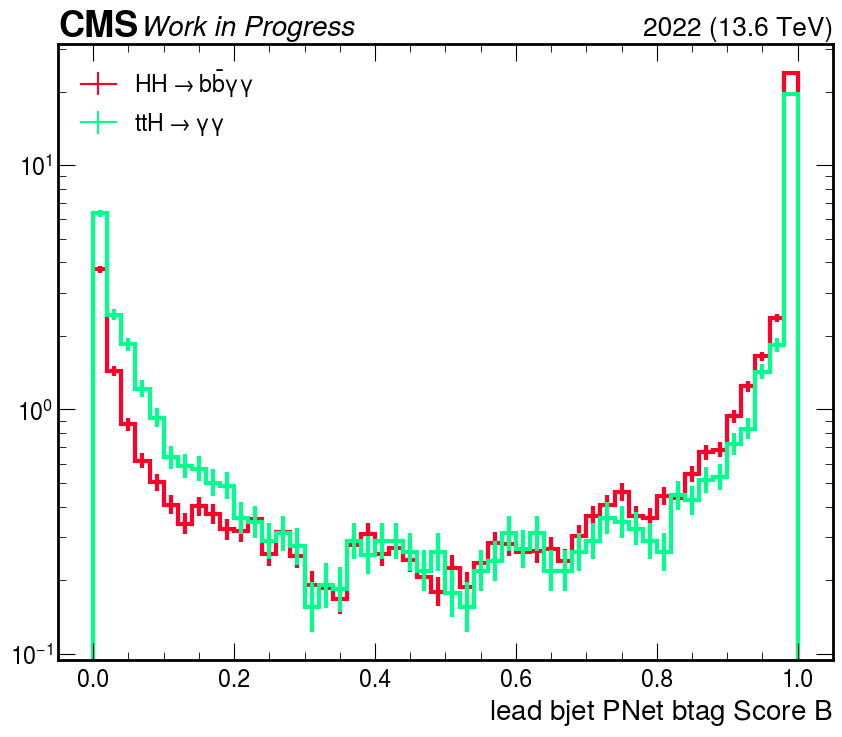

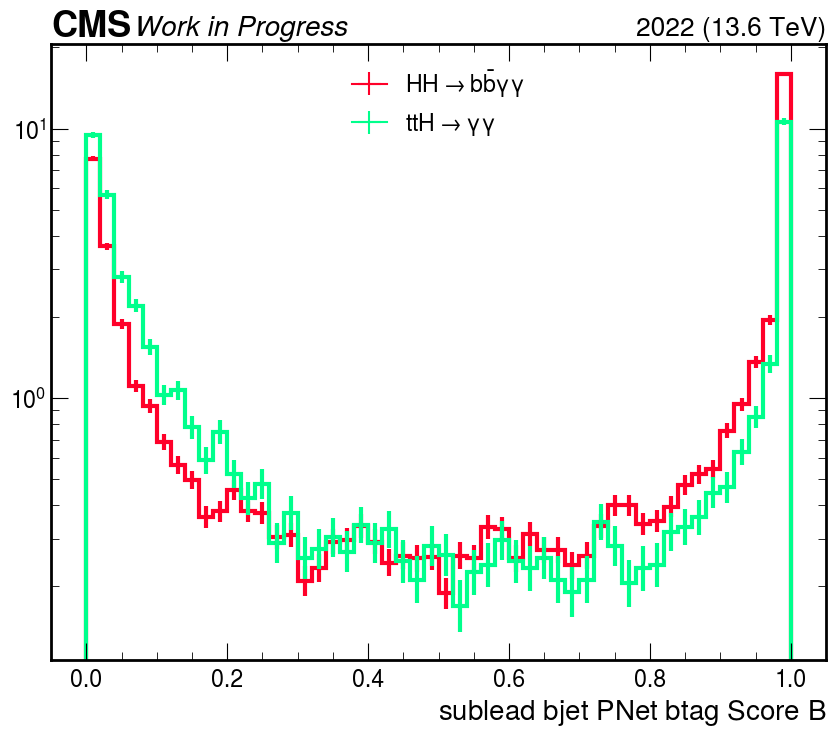

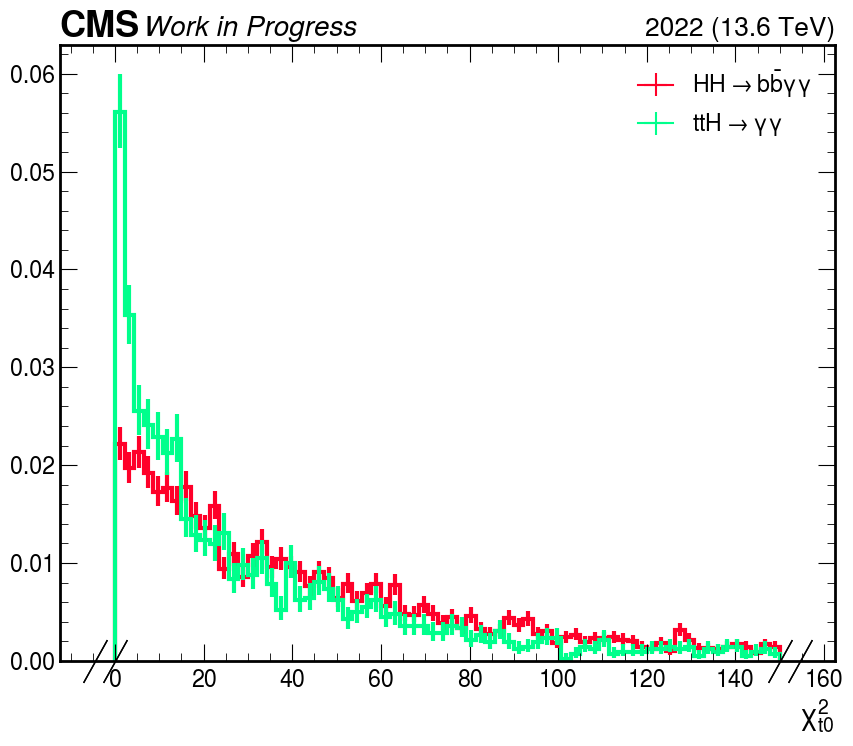

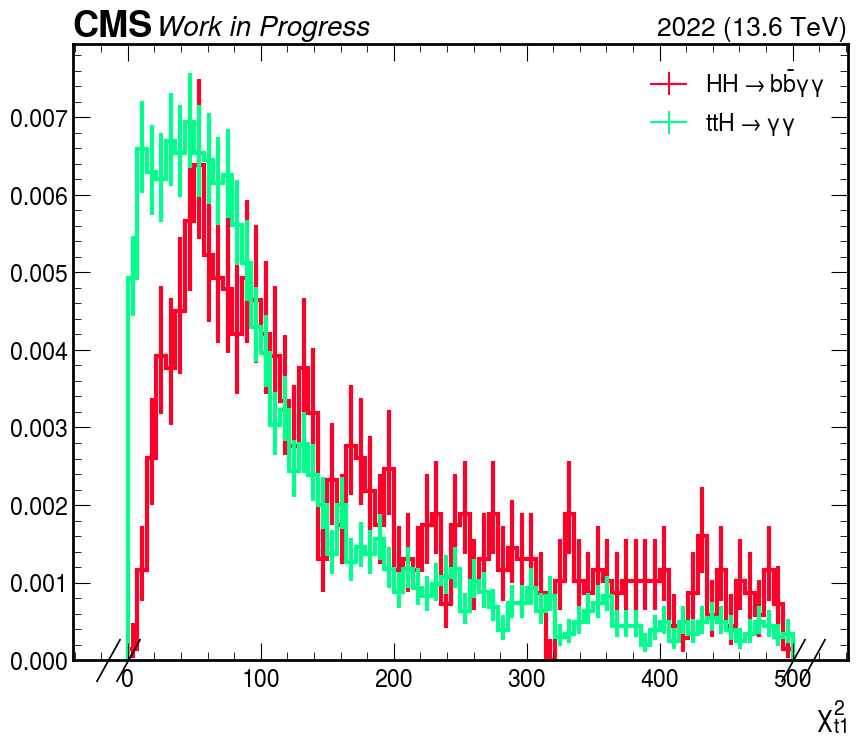

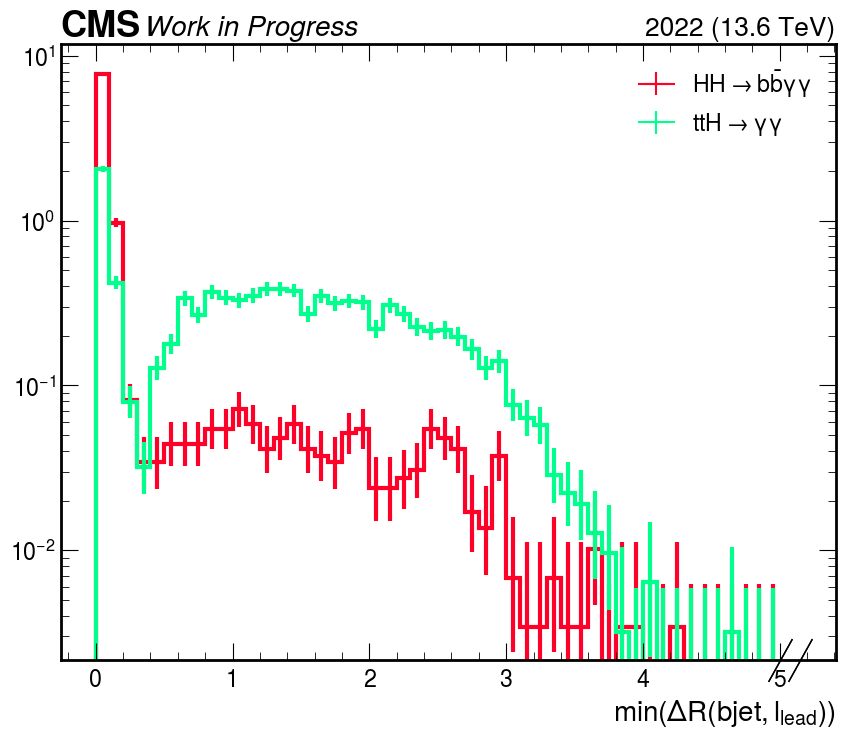

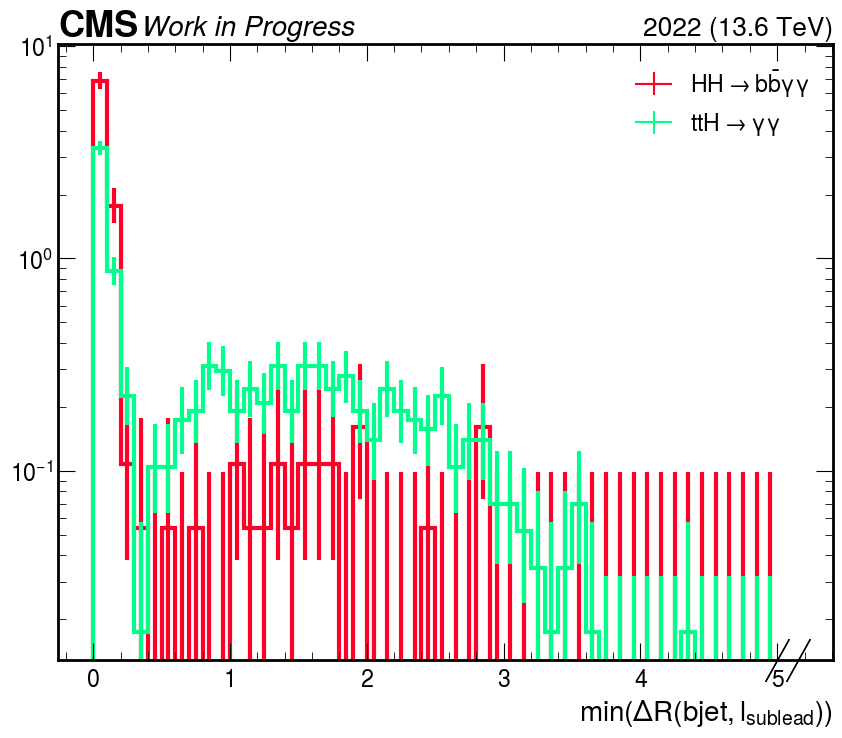

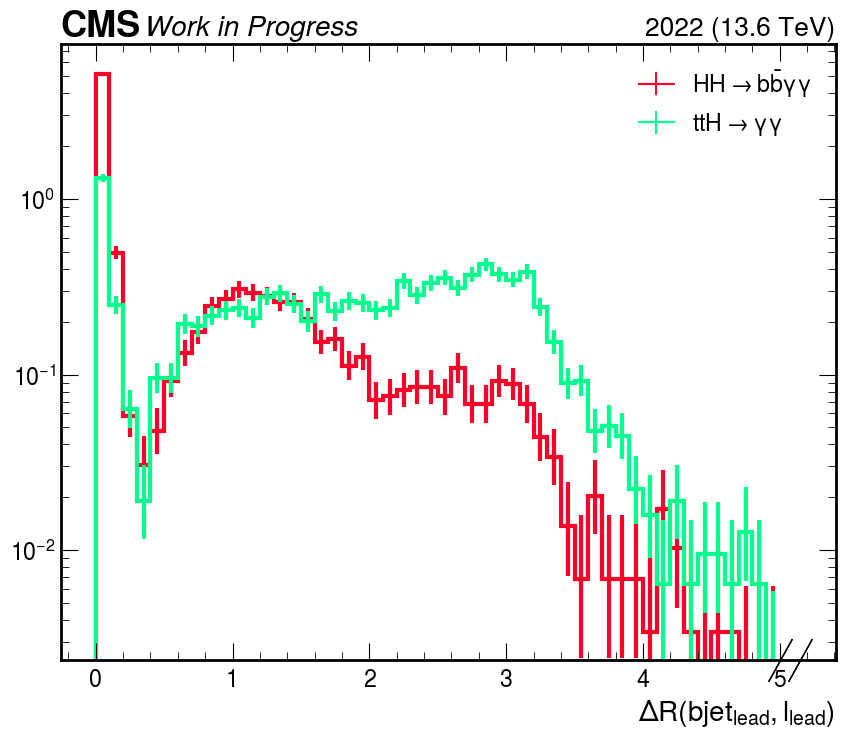

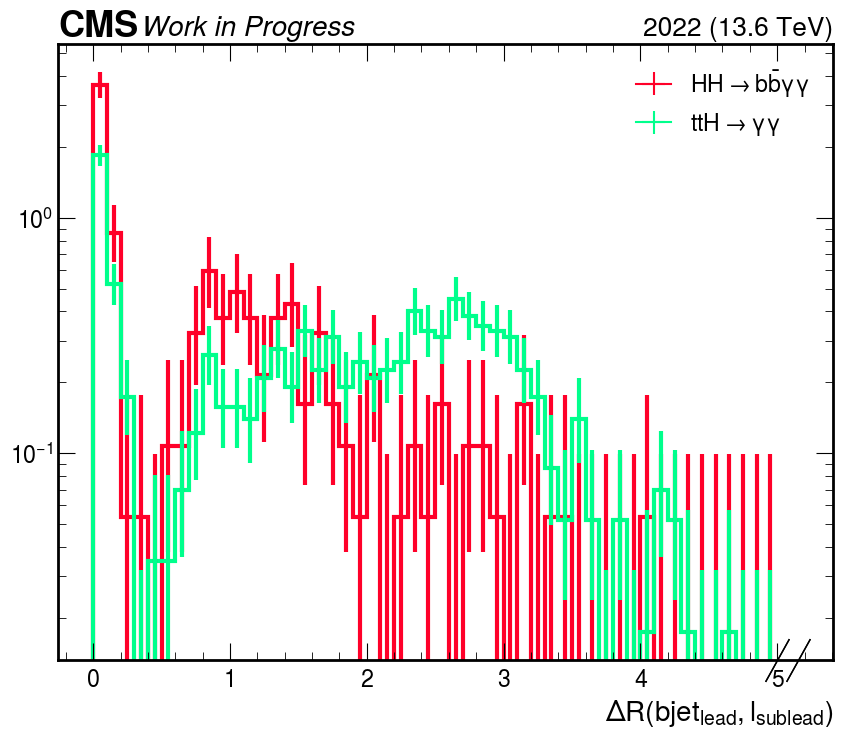

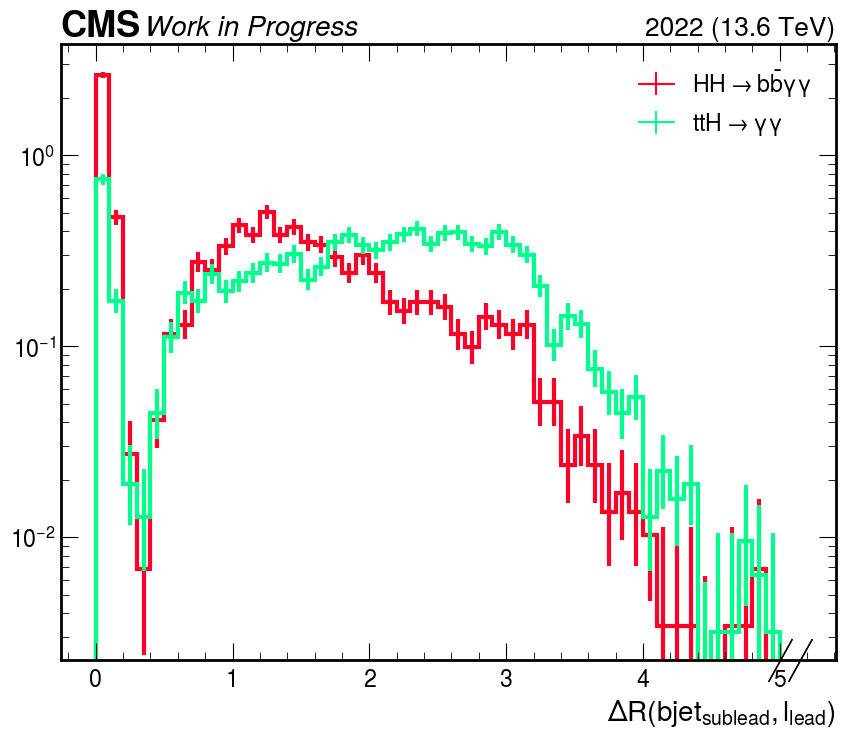

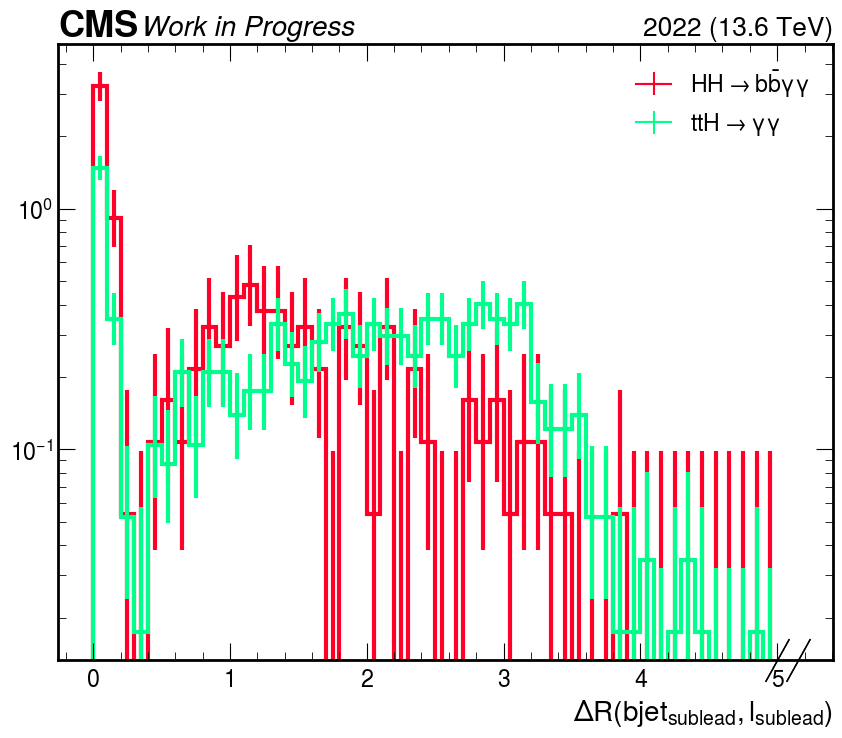

In [16]:
NUM_COLORS = len(samples)
cm = plt.get_cmap('gist_rainbow')

for field in hists_axes.keys():
    i=0
    fig, ax = plt.subplots(figsize=(10, 8))
    for sample_name in samples.keys():
    # for sample_name in ['sig', 'bkg']:
        hep.histplot(hists[sample_name][field], 
                             ax=ax, 
                             label=simplified_labels[sample_name],
                             linewidth=3,
                             color=cm(i/NUM_COLORS),
                             density=True,
                         )
        i+=1
    hep.cms.lumitext(f"{2022} (13.6 TeV)", ax=ax)
    hep.cms.text("Work in Progress", ax=ax)
    ax.legend(ncol=1, loc = 'best')
    if re.match('chi_t', field) is None and re.match('DeltaPhi', field) is None:
        ax.set_yscale('log')
    else:
        ax.set_yscale('linear')
    # ax.set_yscale('log')
    if not os.path.exists(destdir):
        os.mkdir(destdir)
    plt.savefig(f'{destdir}/1dhist_{field}_ttHandHH.pdf')
    plt.savefig(f'{destdir}/1dhist_{field}_ttHandHH.png')
    # plt.savefig(f'{destdir}/1dhist_scaled_{field}_ttHandHH.pdf')
    # plt.savefig(f'{destdir}/1dhist_scaled_{field}_ttHandHH.png')
    # plt.close()

In [17]:
# def jet_mask(sample, jet_size, i, t_mask, i_mask=None):
#     jet_i_mask = t_mask & ak.where(
#             sample[f'jet{i}_4mom'].deltaR(sample[f'lead_bjet_4mom']) > jet_size, True, False
#         ) & ak.where(
#             sample[f'jet{i}_4mom'].deltaR(sample[f'sublead_bjet_4mom']) > jet_size, True, False
#         ) & ak.where(sample[f'jet{i}_pt'] != -999, True, False)
#     if i_mask is not None:
#         jet_i_mask = jet_i_mask & i_mask

#     return jet_i_mask

# def find_wjet_topjet(sample, num_jets, jet_size, w_mass, top_mass, t_mask, chi_form='t0'):

#     jets_4mom = ak.Array(
#         [
#             {f'{i}': ak.mask(sample[f'jet{i}_4mom'], jet_mask(sample, jet_size, i, t_mask))} for i in range(1, 7)
#         ], with_name='Momentum4D'
#     )
#     jet_combos = ak.combinations(
#         jets_4mom, 2, axis=1, fields=['lead_jet', 'sublead_jet']
#     )
    